In [15]:
import pandas as pd
from prophet import Prophet
import holidays
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


In [4]:
RAW_CONSOLIDATED = r"C:\Users\fdcontreras\OneDrive - Indra\Universidad\Despliegue de Soluciones Analíticas\Proyecto_Despliegue\Proyecto_Despliegue\data\02_processed\olist_consolidated_dataset.csv"
df = pd.read_csv(
    RAW_CONSOLIDATED, 
    parse_dates=["order_purchase_timestamp"]
)

In [6]:
df["order_date"] = df["order_purchase_timestamp"].dt.date

# 2) Reconstruimos daily
daily = (
    df.groupby(["product_category_name_english", "order_date"])
      .size()
      .reset_index(name="units_sold")
)

In [7]:
rank = (
    daily
      .groupby("product_category_name_english")["units_sold"]
      .agg(nunique="nunique", mean="mean")
      .reset_index()
)
rank = rank[rank["nunique"] >= 45].sort_values("mean", ascending=False)
TOP_N = 10
top_cats = rank.head(TOP_N)["product_category_name_english"].tolist()
print("Top categorías seleccionadas para Prophet:", top_cats)

Top categorías seleccionadas para Prophet: ['bed_bath_table', 'health_beauty', 'furniture_decor', 'computers_accessories']


Categorías válidas: 58


20:29:47 - cmdstanpy - INFO - Chain [1] start processing
20:29:48 - cmdstanpy - INFO - Chain [1] done processing
20:29:48 - cmdstanpy - INFO - Chain [1] start processing
20:29:49 - cmdstanpy - INFO - Chain [1] done processing
20:29:49 - cmdstanpy - INFO - Chain [1] start processing
20:29:50 - cmdstanpy - INFO - Chain [1] done processing
20:29:51 - cmdstanpy - INFO - Chain [1] start processing
20:29:51 - cmdstanpy - INFO - Chain [1] done processing
20:29:52 - cmdstanpy - INFO - Chain [1] start processing
20:29:52 - cmdstanpy - INFO - Chain [1] done processing
20:29:53 - cmdstanpy - INFO - Chain [1] start processing
20:29:53 - cmdstanpy - INFO - Chain [1] done processing
20:29:54 - cmdstanpy - INFO - Chain [1] start processing
20:29:55 - cmdstanpy - INFO - Chain [1] done processing
20:29:55 - cmdstanpy - INFO - Chain [1] start processing
20:29:56 - cmdstanpy - INFO - Chain [1] done processing
20:29:57 - cmdstanpy - INFO - Chain [1] start processing
20:29:57 - cmdstanpy - INFO - Chain [1]

[furniture_bedroom] Sin solapamiento test/predicción, se omite métricas.


20:30:28 - cmdstanpy - INFO - Chain [1] start processing
20:30:29 - cmdstanpy - INFO - Chain [1] done processing
20:30:29 - cmdstanpy - INFO - Chain [1] start processing
20:30:30 - cmdstanpy - INFO - Chain [1] done processing
20:30:31 - cmdstanpy - INFO - Chain [1] start processing
20:30:31 - cmdstanpy - INFO - Chain [1] done processing
20:30:32 - cmdstanpy - INFO - Chain [1] start processing
20:30:33 - cmdstanpy - INFO - Chain [1] done processing
20:30:33 - cmdstanpy - INFO - Chain [1] start processing
20:30:34 - cmdstanpy - INFO - Chain [1] done processing
20:30:35 - cmdstanpy - INFO - Chain [1] start processing
20:30:35 - cmdstanpy - INFO - Chain [1] done processing
20:30:36 - cmdstanpy - INFO - Chain [1] start processing
20:30:36 - cmdstanpy - INFO - Chain [1] done processing
20:30:37 - cmdstanpy - INFO - Chain [1] start processing
20:30:38 - cmdstanpy - INFO - Chain [1] done processing
20:30:38 - cmdstanpy - INFO - Chain [1] start processing
20:30:39 - cmdstanpy - INFO - Chain [1]

MAE       RMSE     MAPE (%)
category                                                                  
agro_industry_and_commerce                4.376239   4.813290   341.040705
air_conditioning                          0.649959   1.022980    28.295896
art                                       0.622408   0.802265    37.888339
audio                                     0.864928   1.057409    50.015455
auto                                      6.252094   6.871354   132.649851
baby                                      4.380136   5.262797   209.334441
bed_bath_table                            7.188414   8.383957    76.048440
books_general_interest                    1.086929   1.163072    79.212120
books_imported                            2.435044   2.435044   243.504389
books_technical                           0.743326   1.006013    34.194981
christmas_supplies                        2.112704   2.328448   211.270366
cine_photo                               25.022483  29.334497  2368.311733
computers                                11.586913  13.527348  1158.691253
computers_accessories                     6.337292   7.713515   163.220067
consoles_games                            2.756131   3.233039   184.338144
construction_tools_construction           3.849115   5.580169    63.275547
construction_tools_lights                 2.708584   2.860155   165.487427
construction_tools_safety                 1.190414   1.448938    48.770026
cool_stuff                                1.466832   1.876972    60.923696
costruction_tools_garden                  0.455784   0.618841    36.371025
costruction_tools_tools                   1.937026   2.189175   164.658629
drinks                                    0.703402   1.341188    33.694689
dvds_blu_ray                              1.499723   1.499723    74.986149
electronics                               2.156249   2.480928    80.126315
fashion_bags_accessories                  1.142736   1.497742    22.938148
fashion_male_clothing                     0.272508   0.272508    27.250832
fashion_shoes                             0.665465   0.723530    62.653230
fashion_underwear_beach                   0.750261   0.779835    75.026051
fixed_telephony                           1.723092   2.232723    54.448408
food                                      2.301454   3.507809    44.927712
food_drink                                1.231303   1.544974    78.837788
furniture_decor                           9.153070  10.382603   145.784678
furniture_living_room                     0.898901   1.403899    41.514428
garden_tools                              3.728421   4.472233   149.154611
health_beauty                            13.349411  16.006448   125.008077
home_appliances                           1.394351   1.649344    88.148170
home_appliances_2                         1.386307   1.518027   137.568169
home_confort                              0.832121   1.088940    49.426052
home_construction                         2.781931   3.864344    54.573023
housewares                                7.534471   9.138971    55.403619
industry_commerce_and_business            0.663555   0.959775    42.051299
kitchen_dining_laundry_garden_furniture   0.680122   1.147389    39.652460
luggage_accessories                       1.334735   1.679467    80.792799
market_place                              0.412476   0.441701    41.247581
musical_instruments                       1.349938   1.924019    73.493866
office_furniture                          2.005802   2.191166    86.248872
perfumery                                 2.918583   4.041927    86.085017
pet_shop                                  3.178946   3.853366    66.101748
signaling_and_security                    0.653861   0.715355    40.500474
small_appliances                          0.786896   0.939079    63.693141
small_appliances_home_oven_and_coffee     1.031249   1.092170   101.135501
sports_leisure                            6.625075   8.290142   173.0094

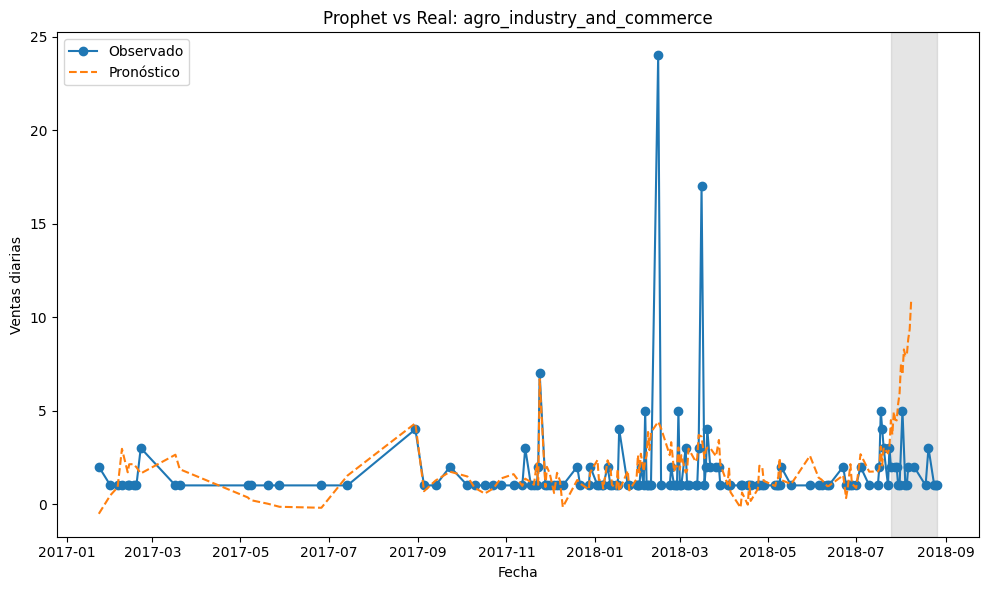

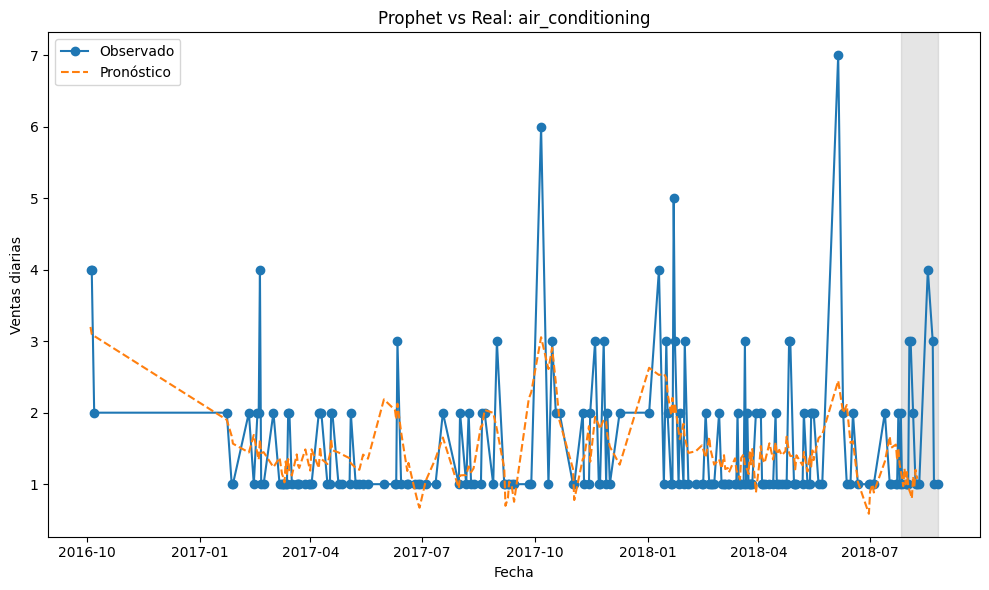

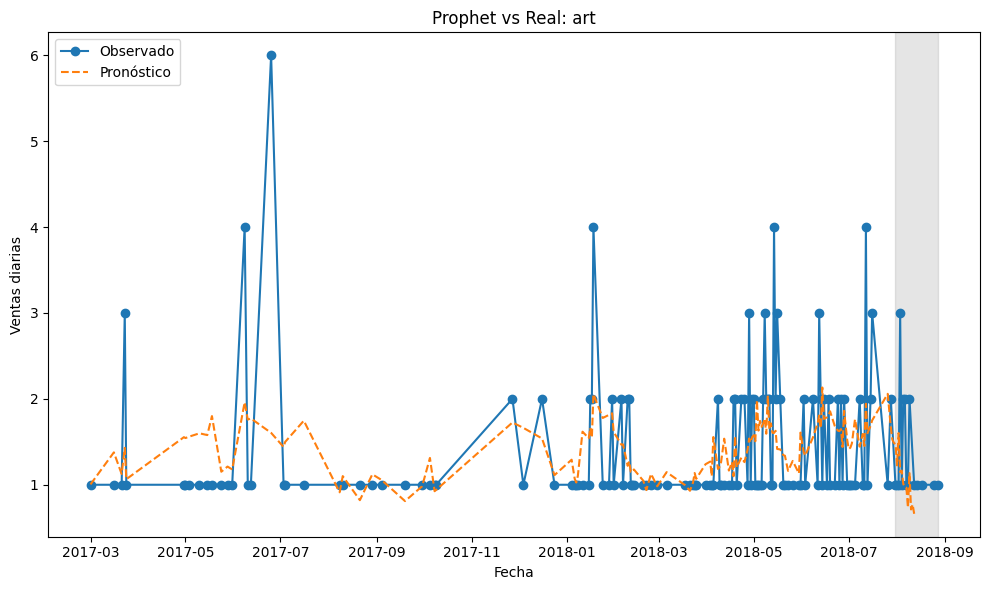

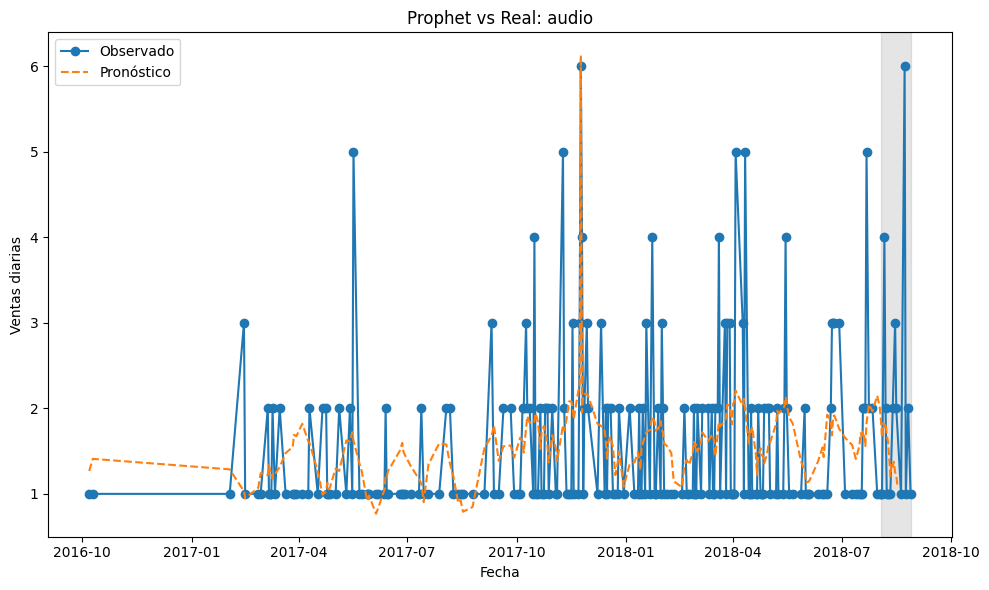

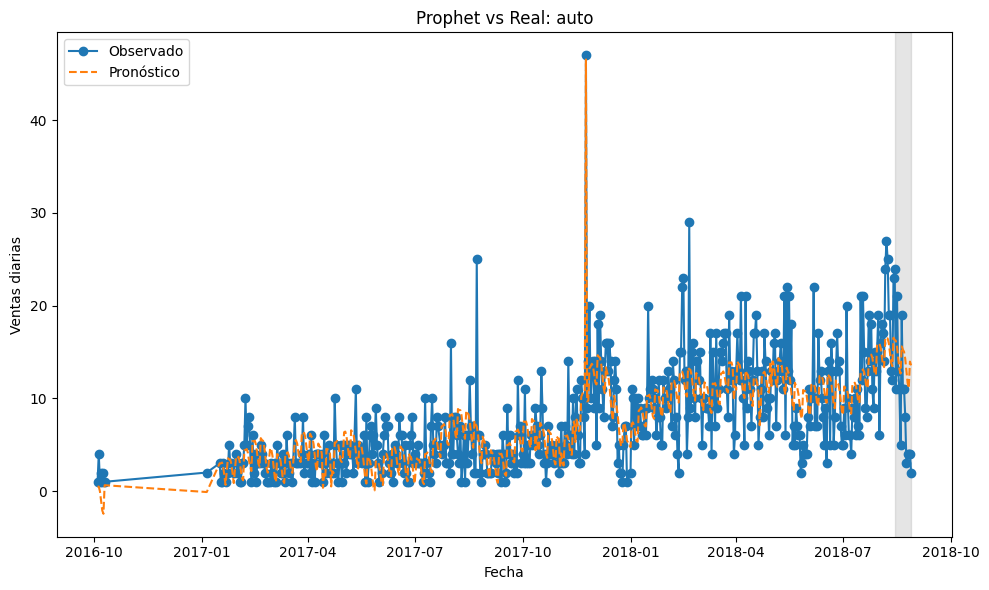

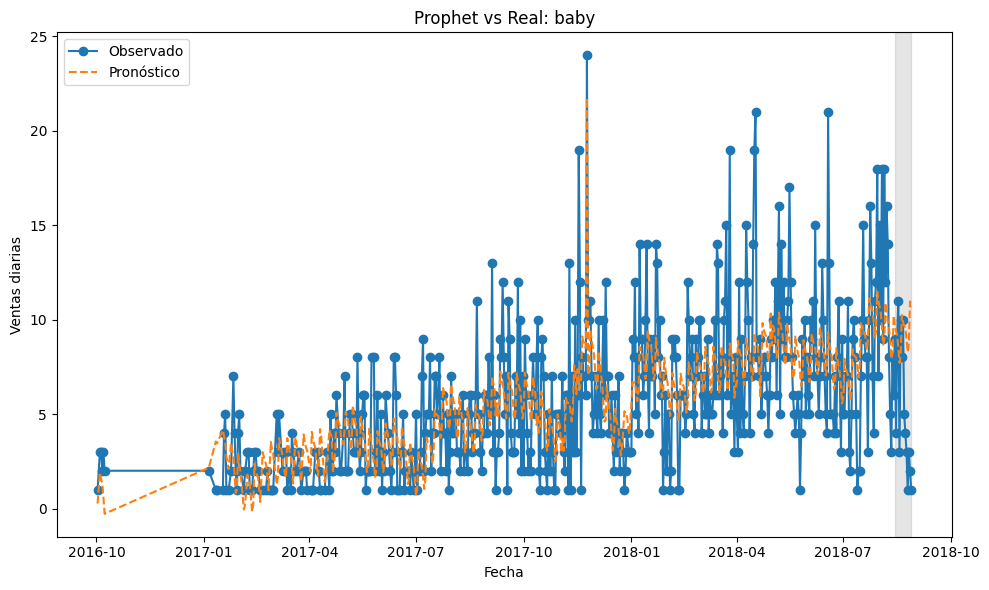

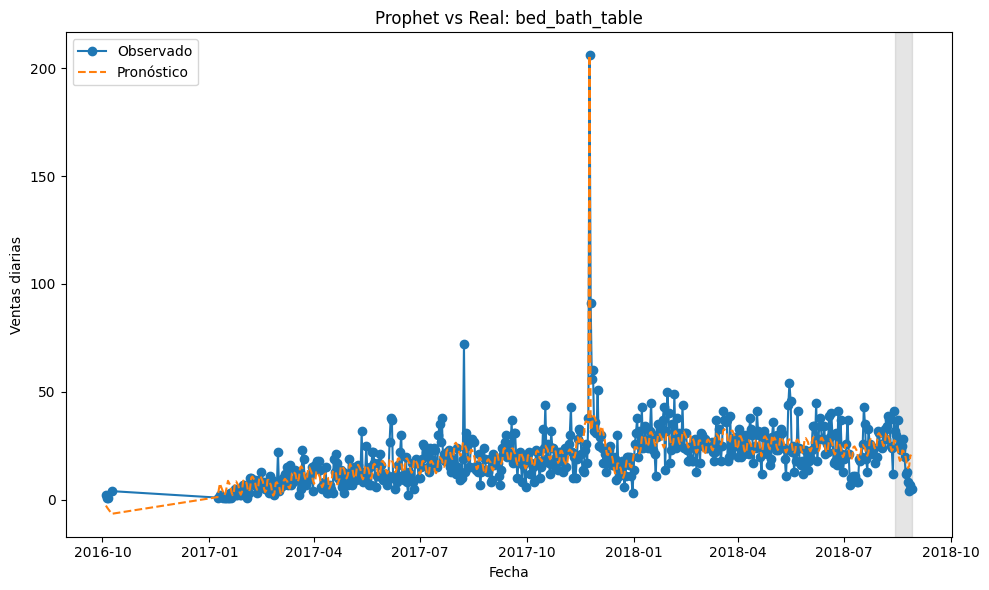

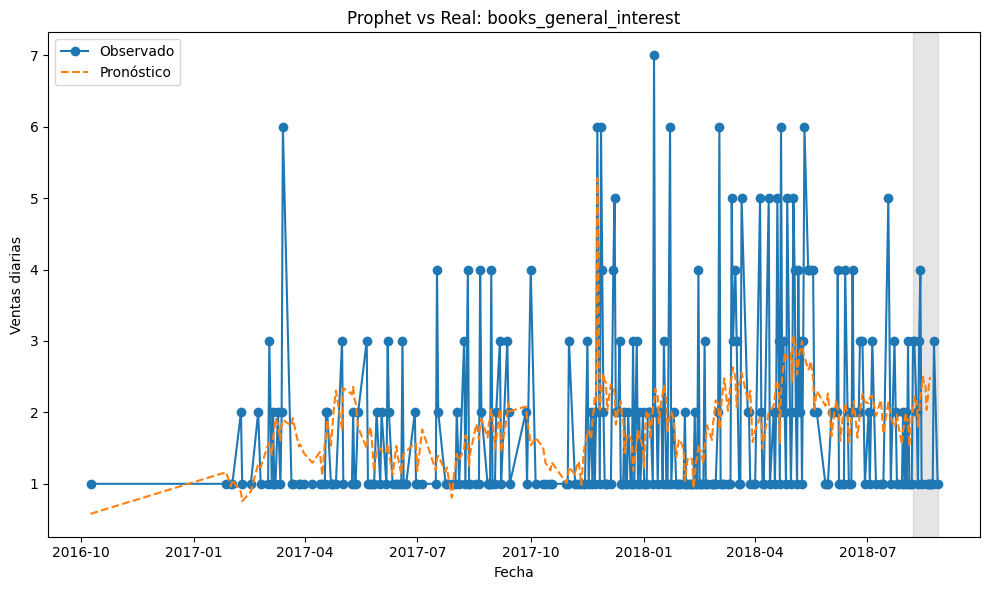

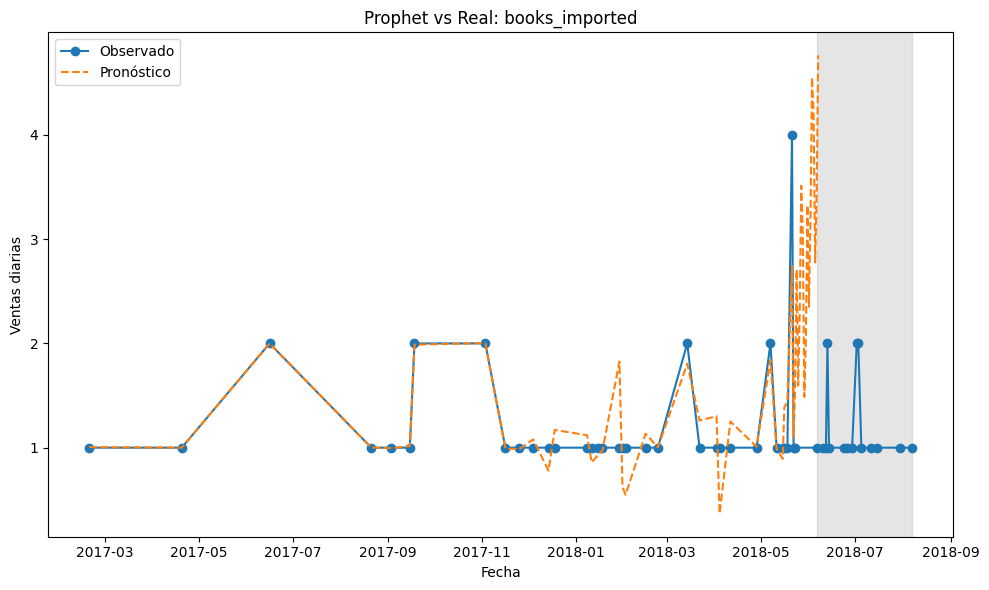

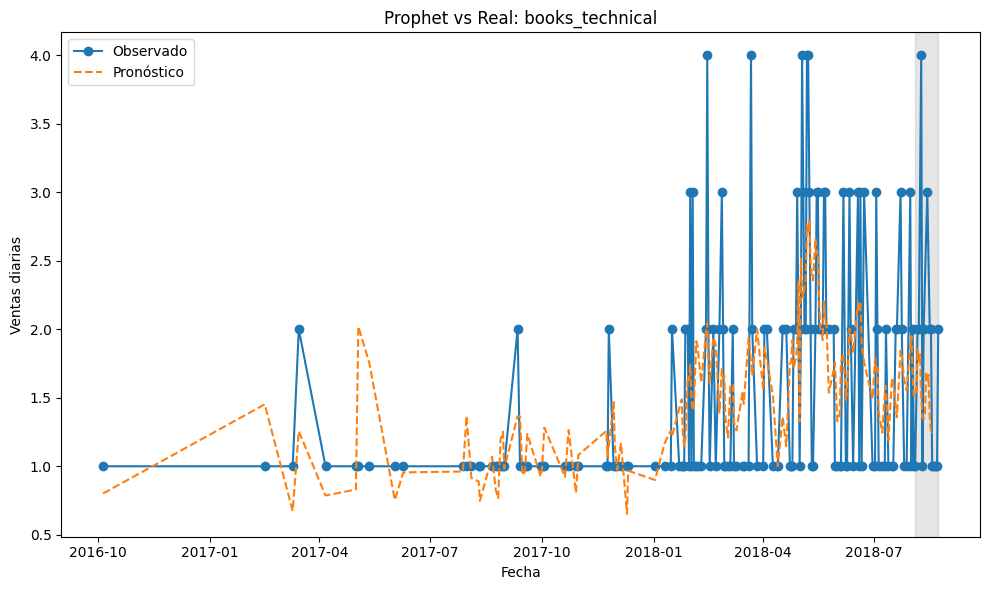

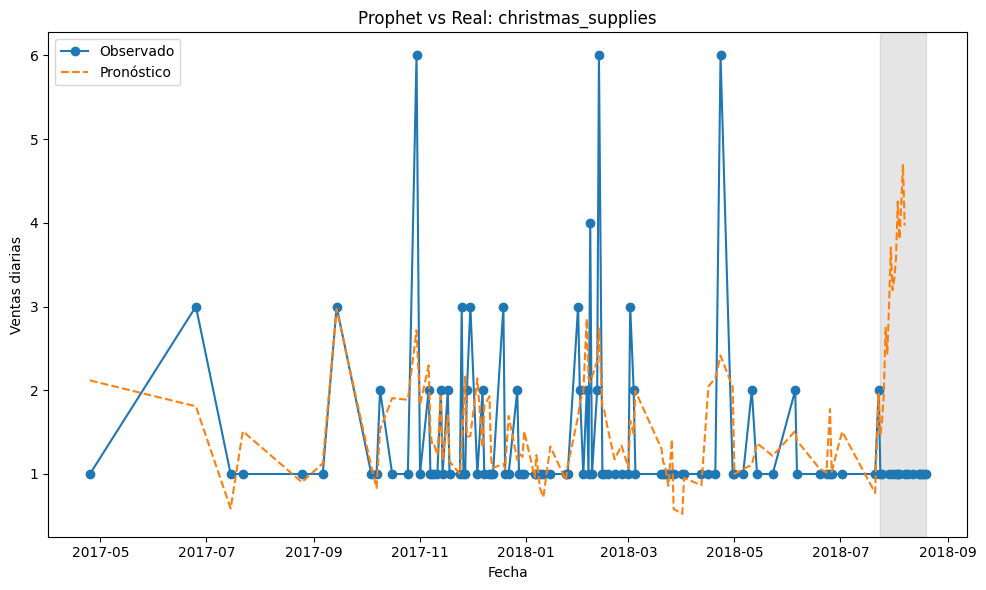

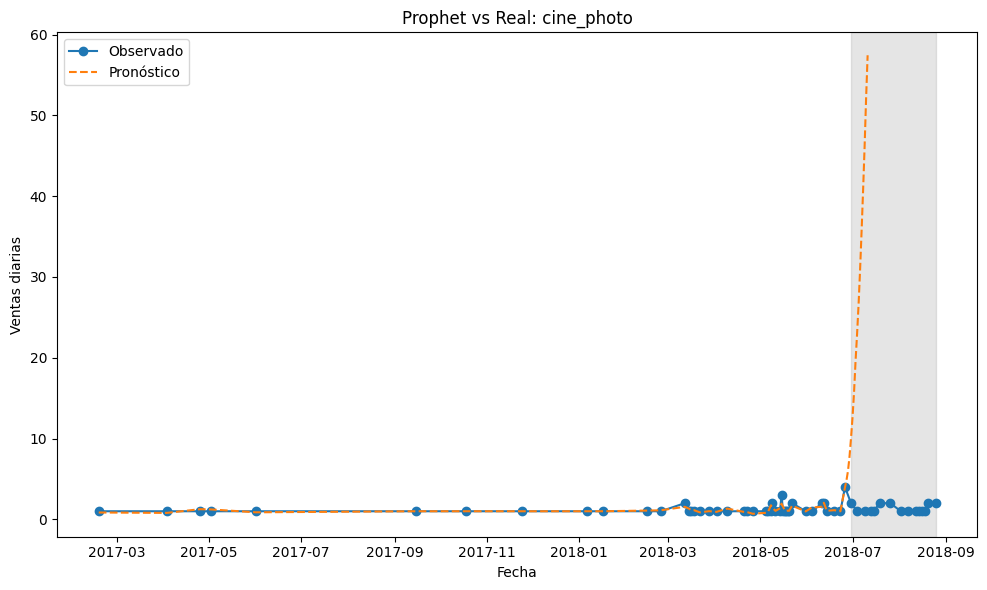

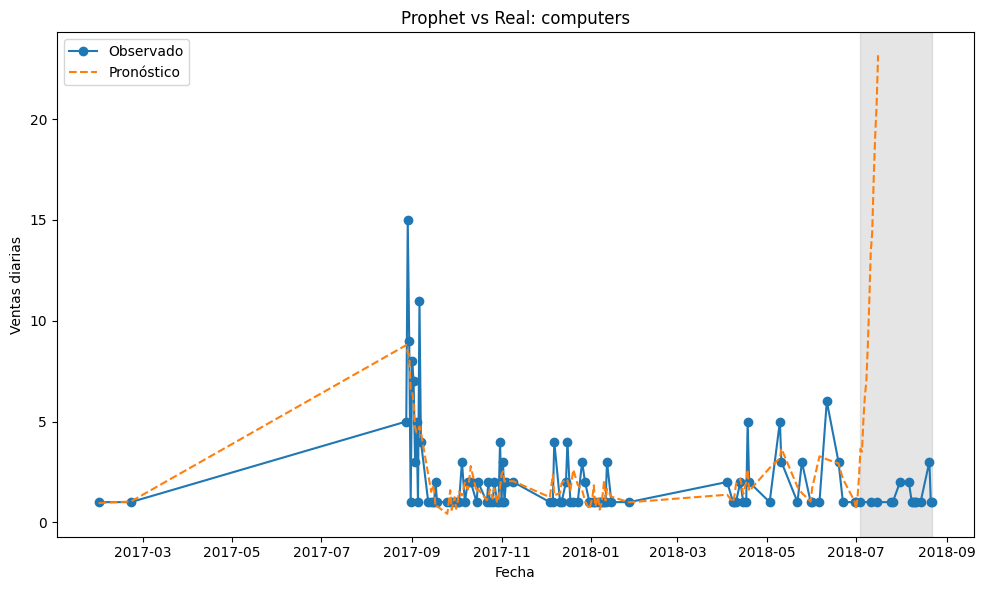

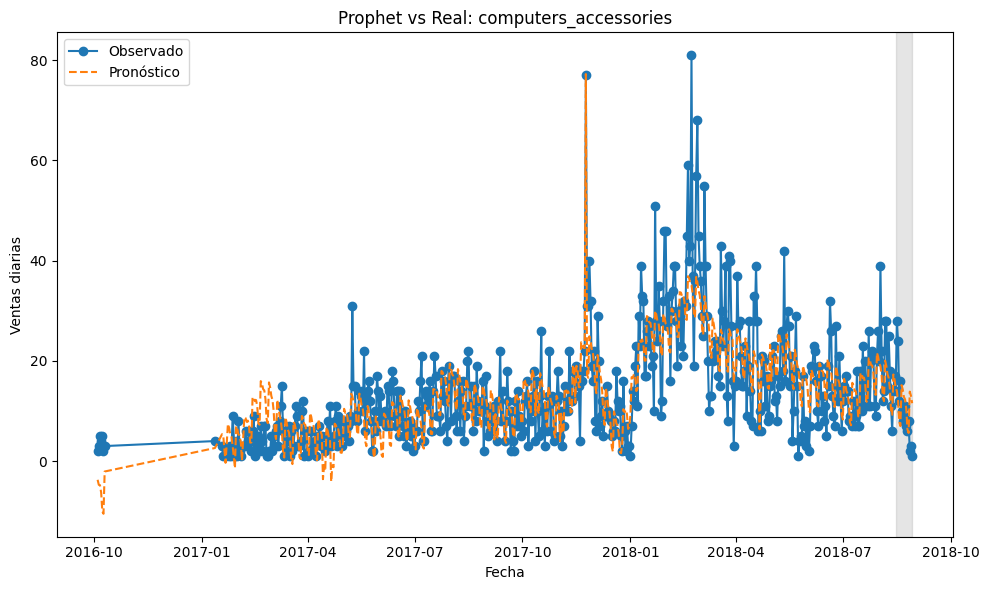

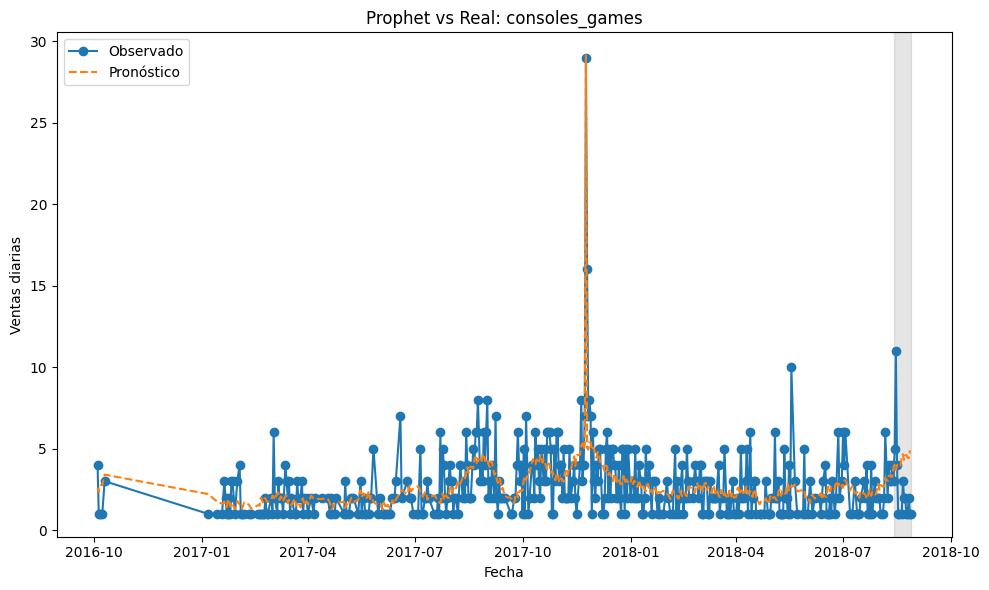

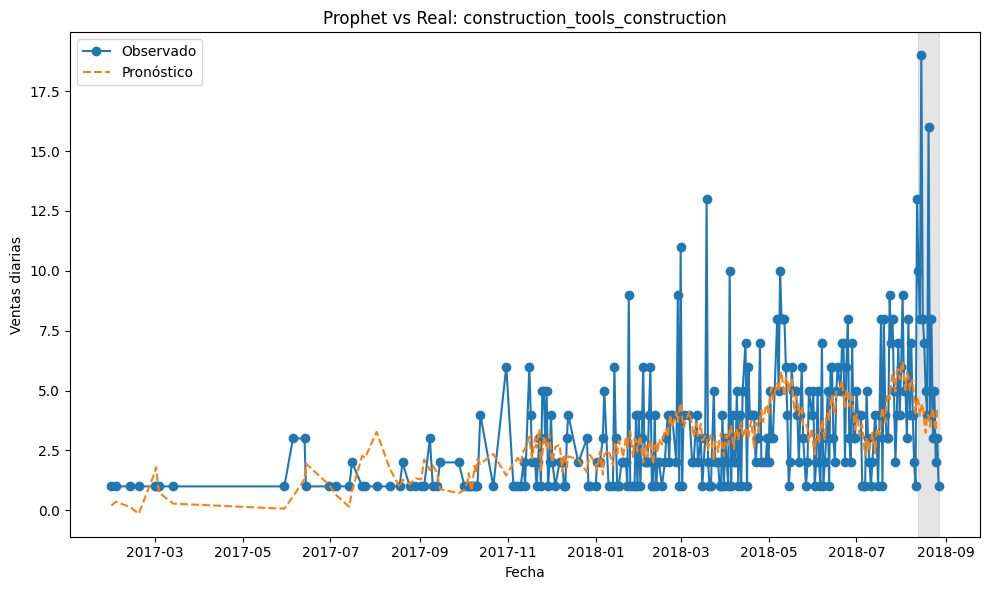

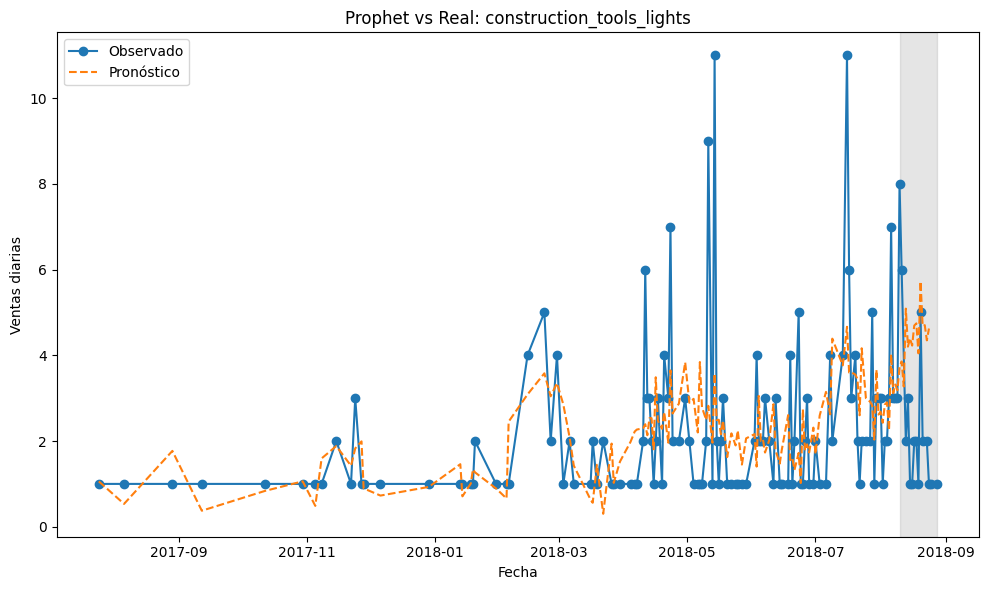

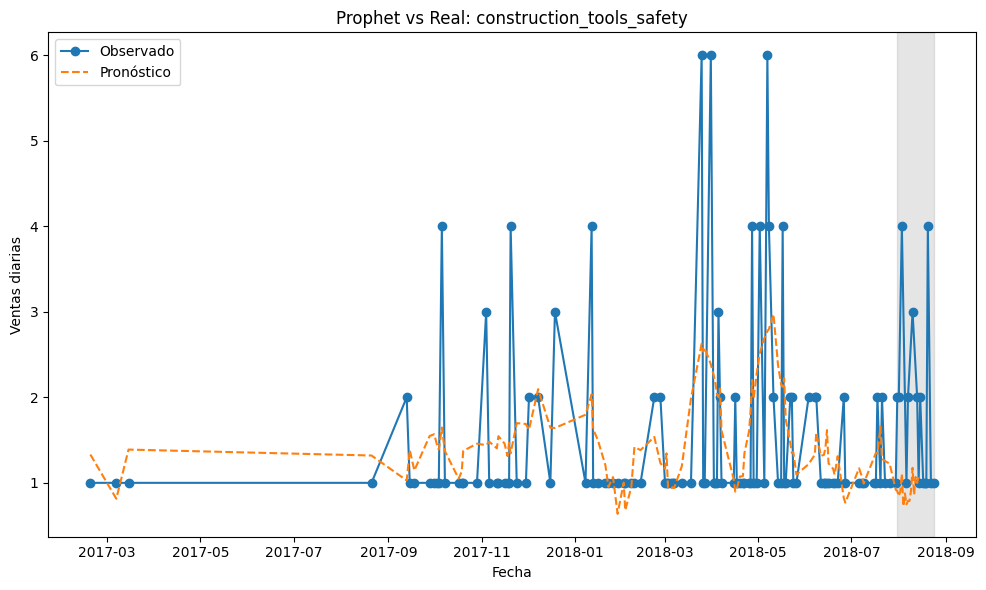

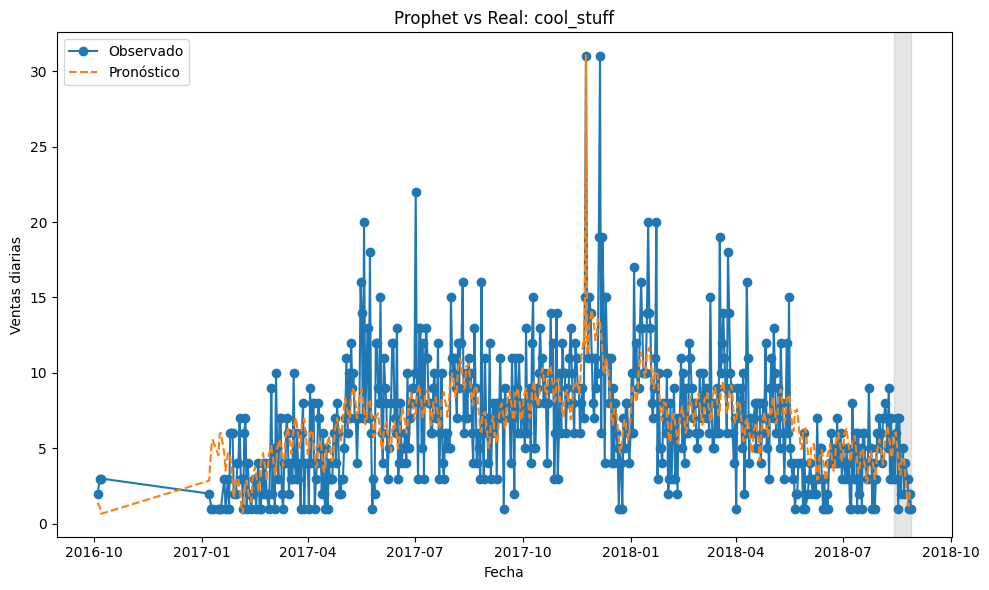

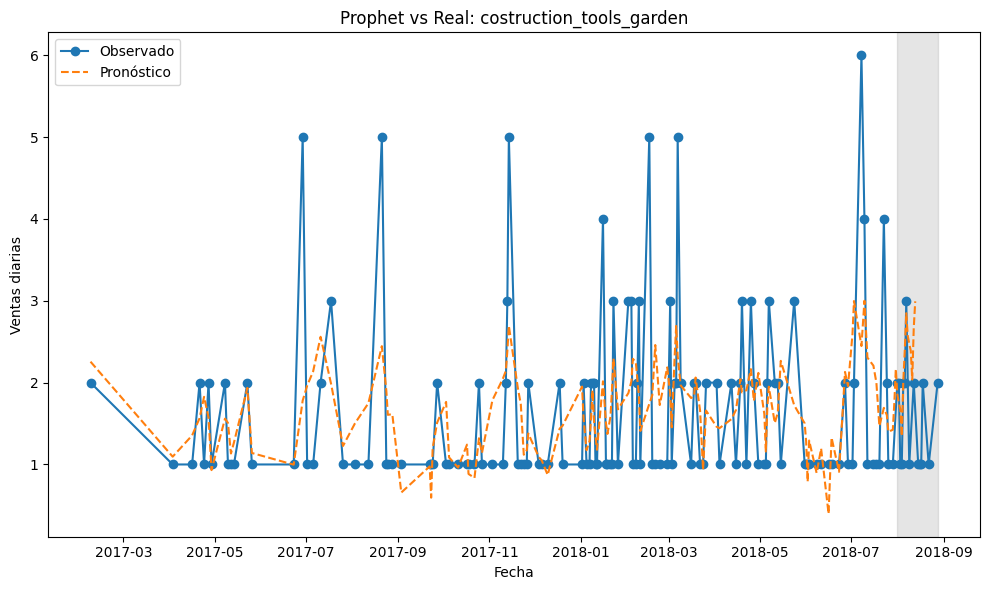

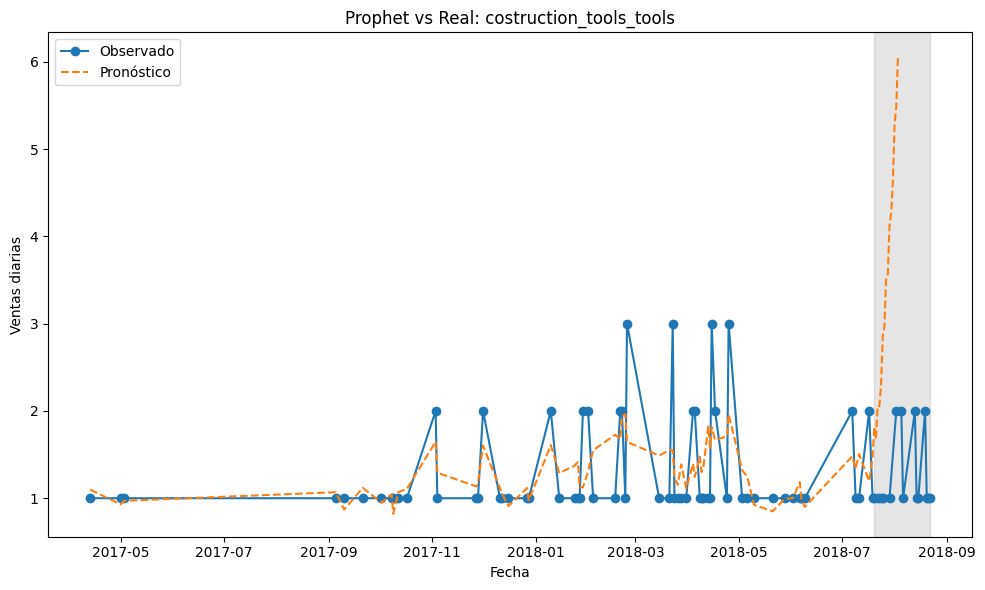

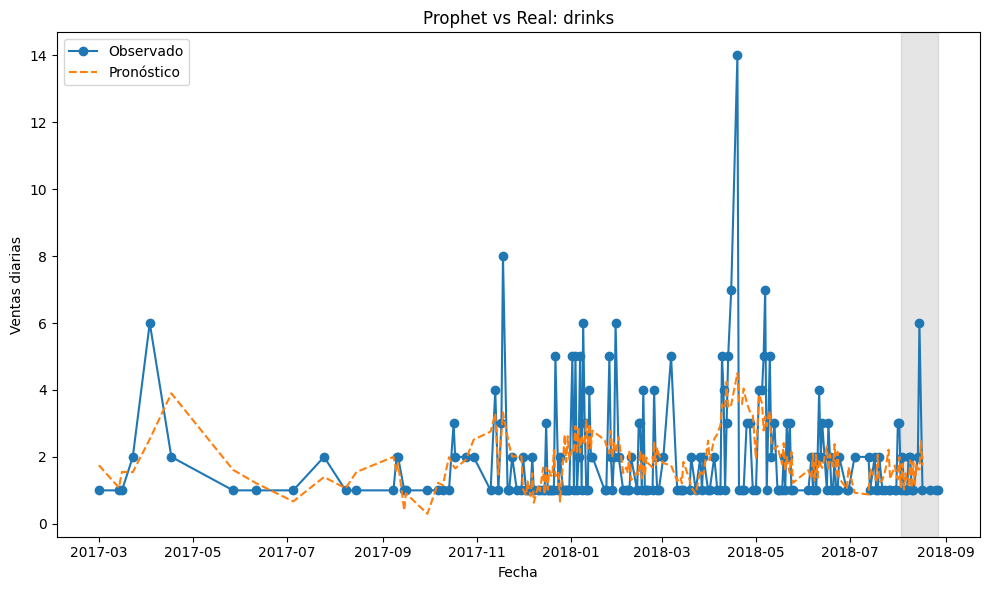

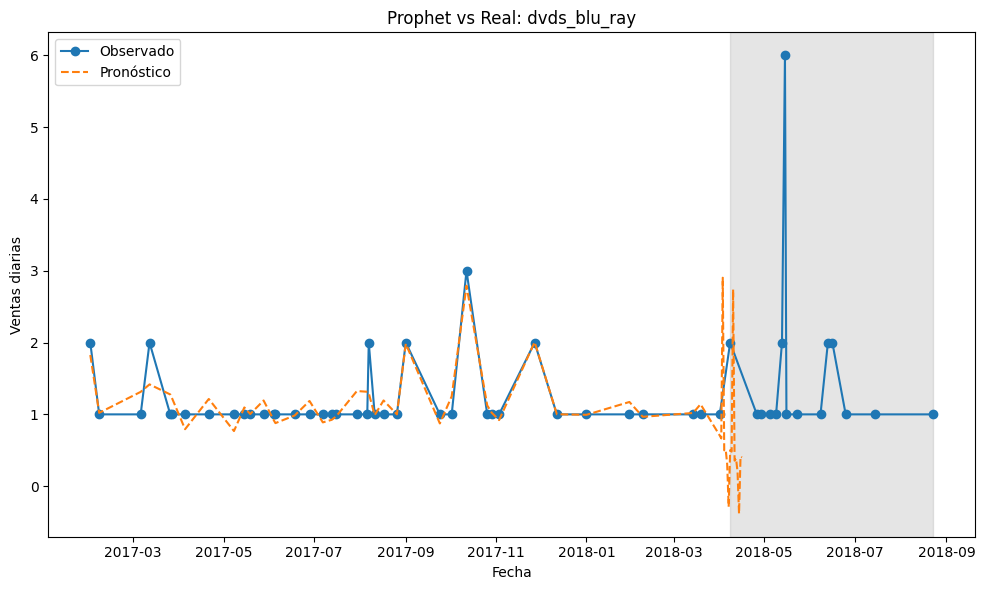

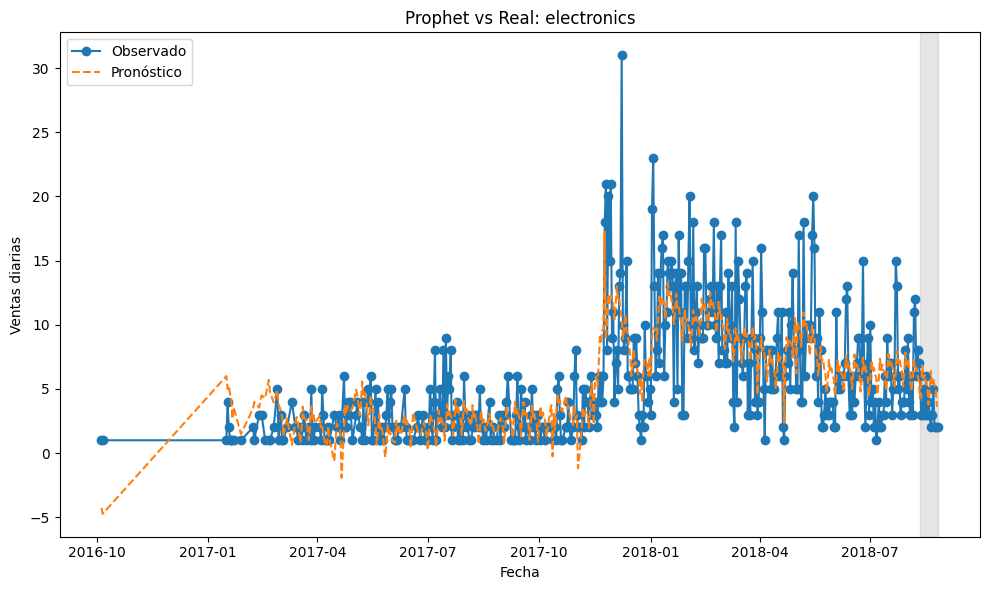

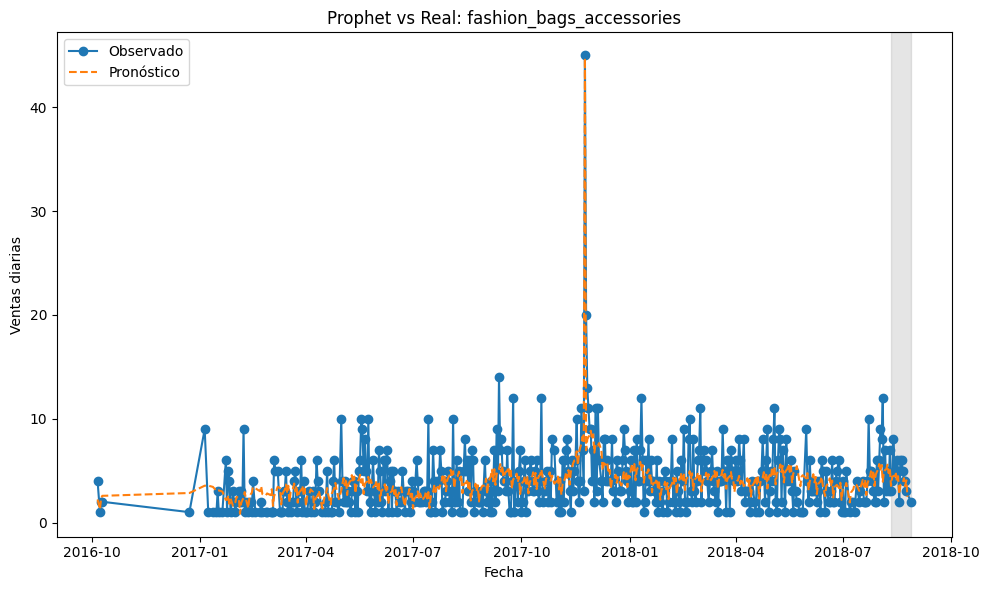

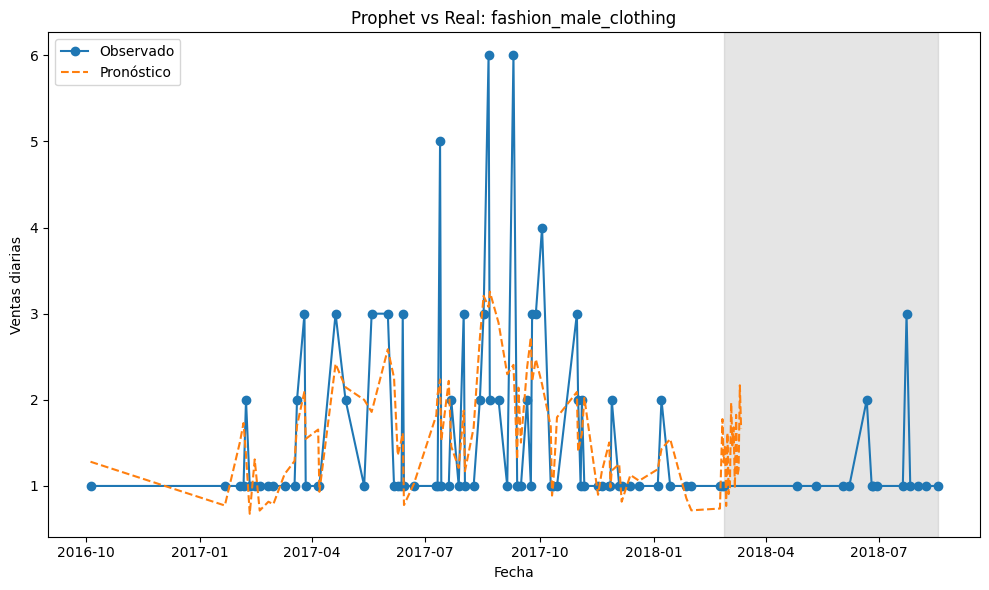

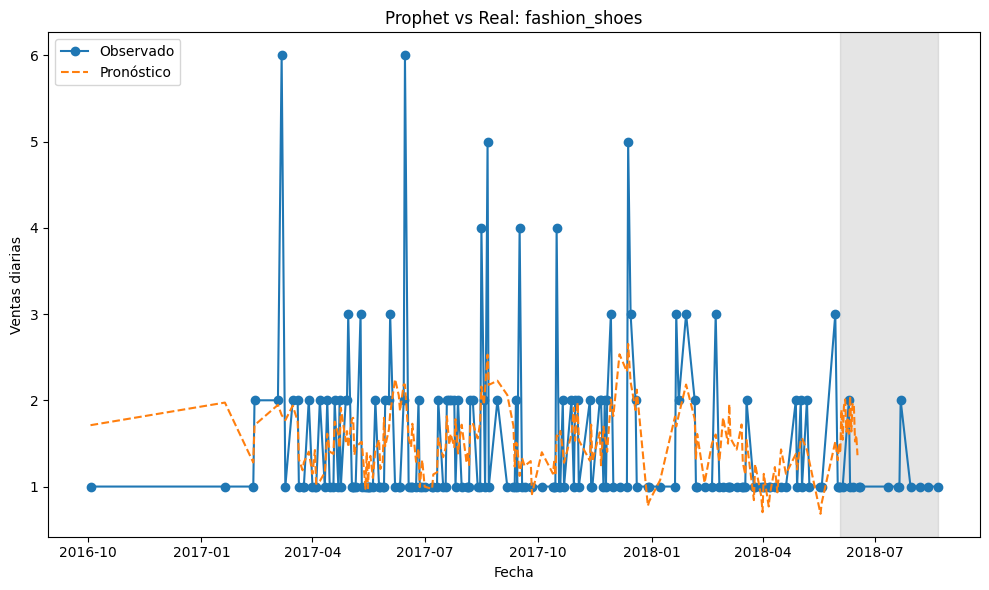

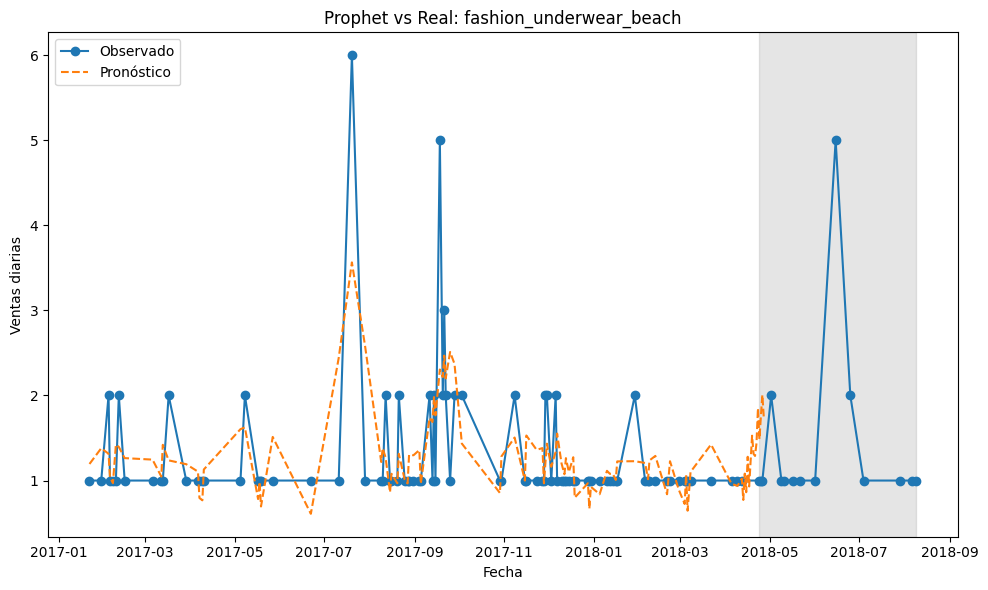

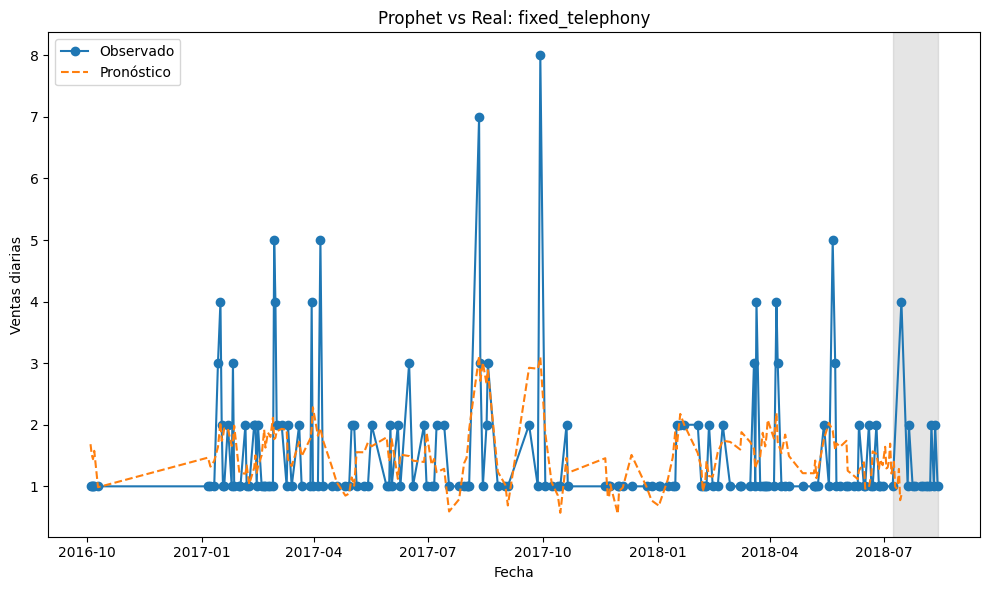

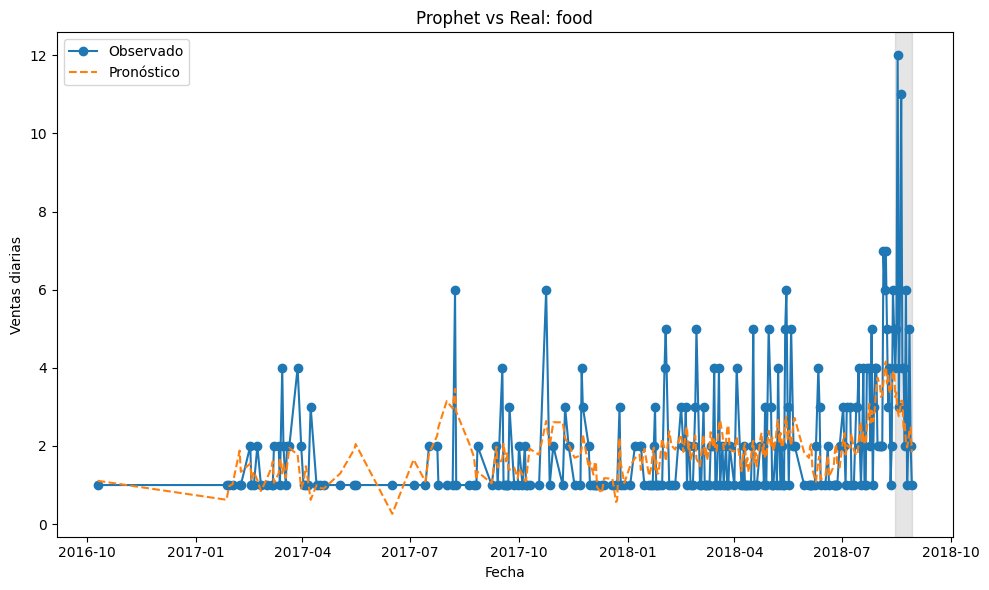

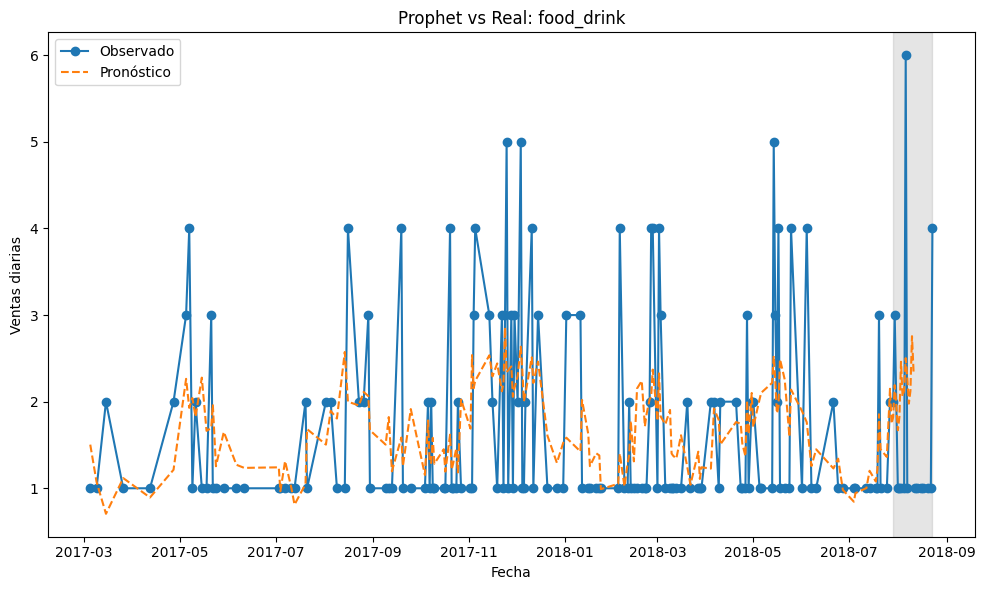

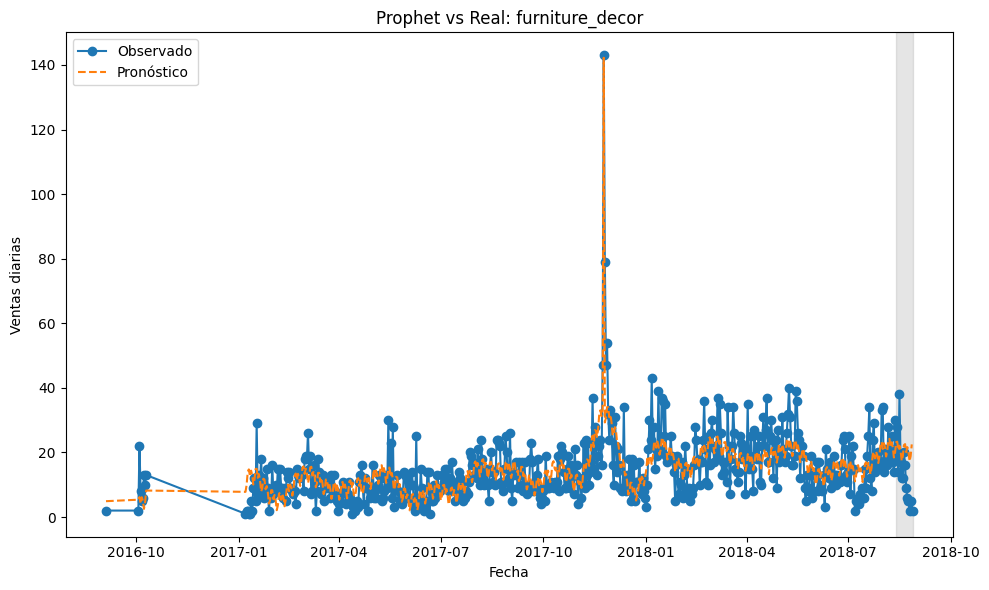

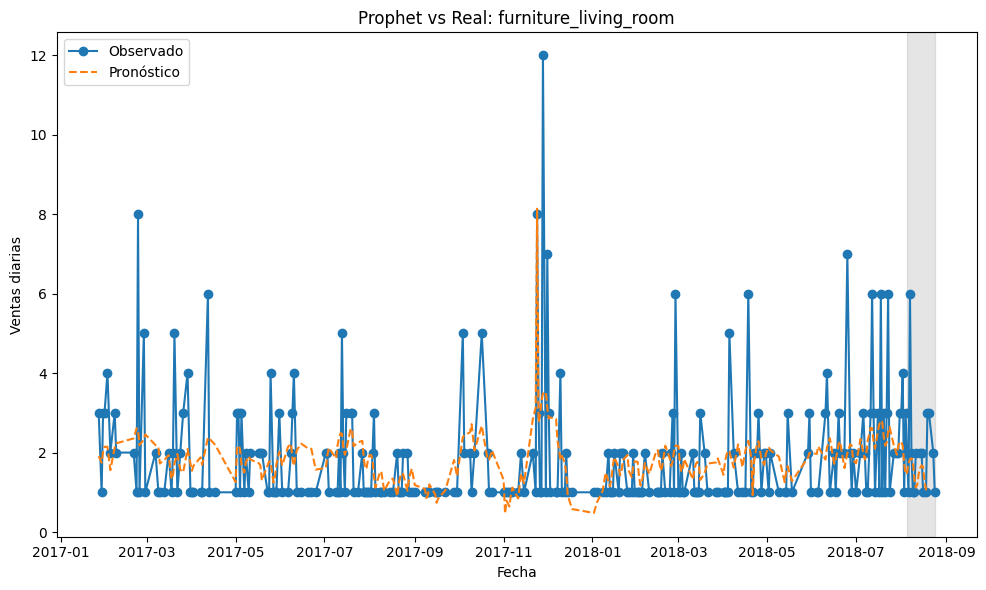

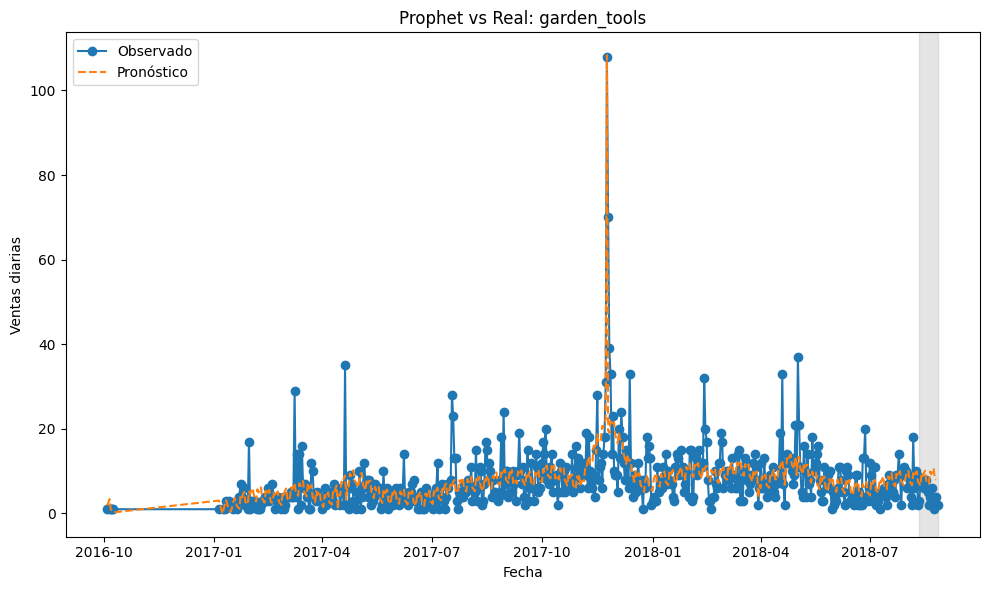

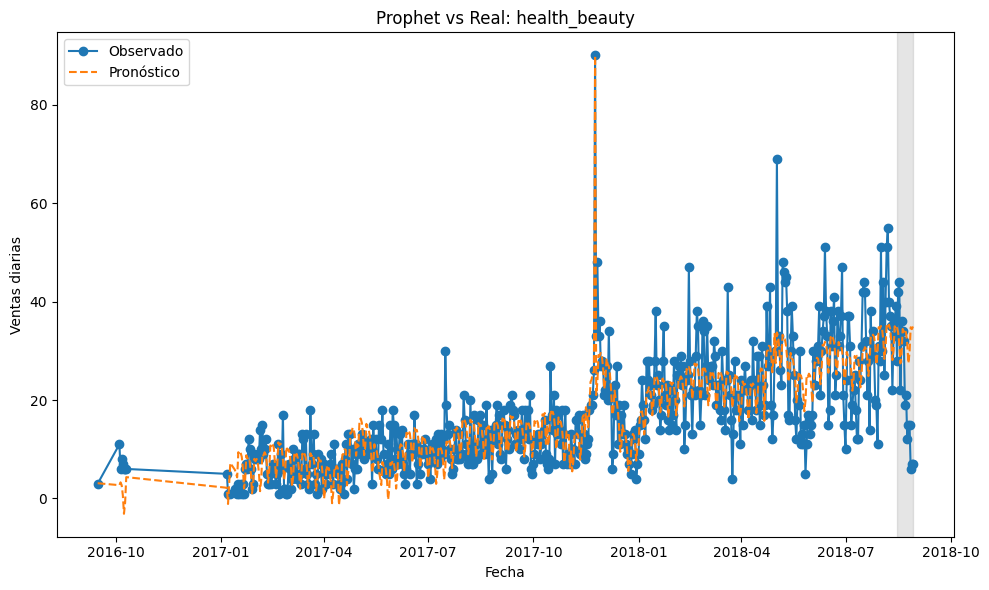

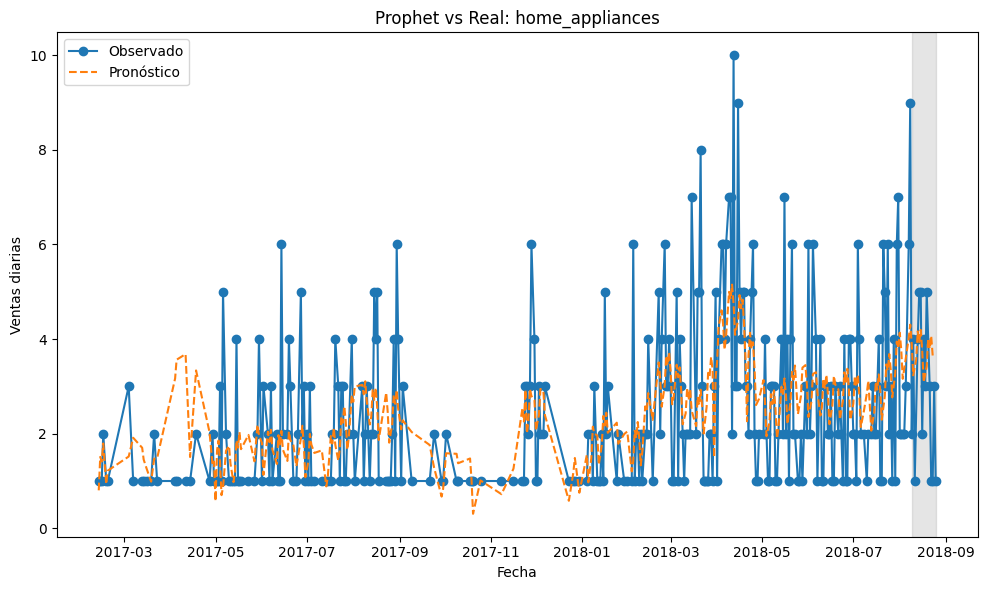

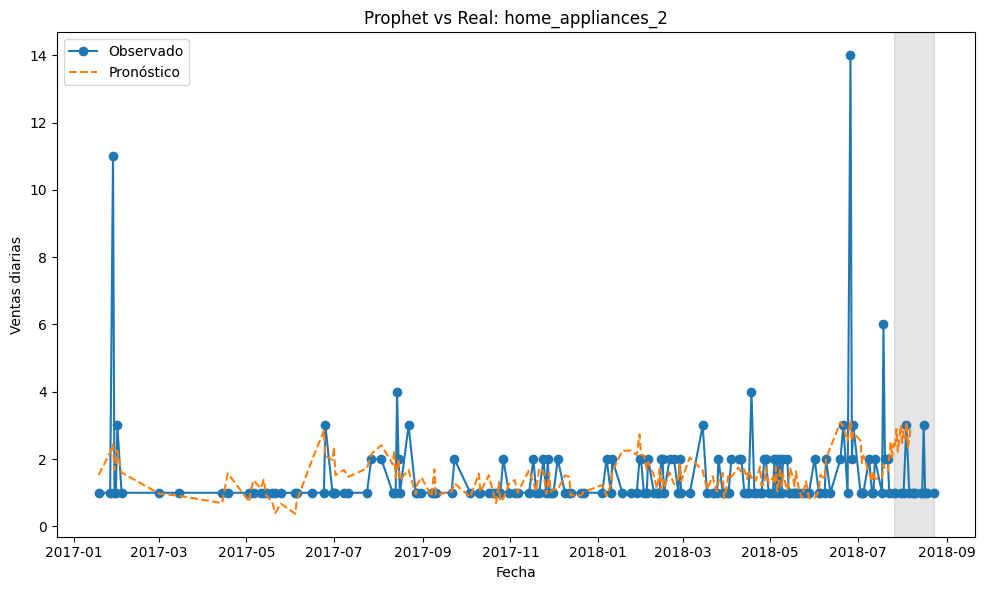

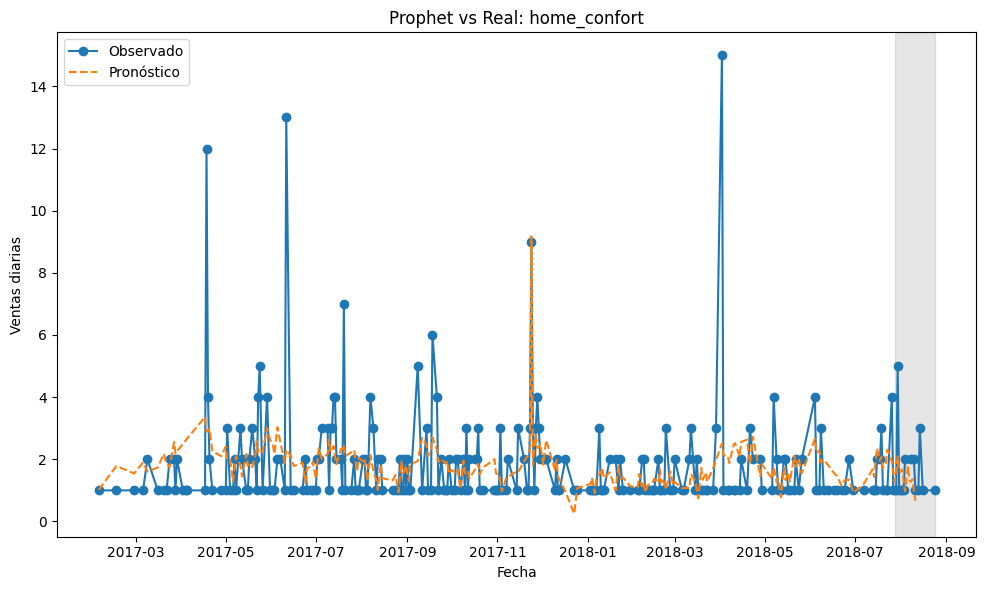

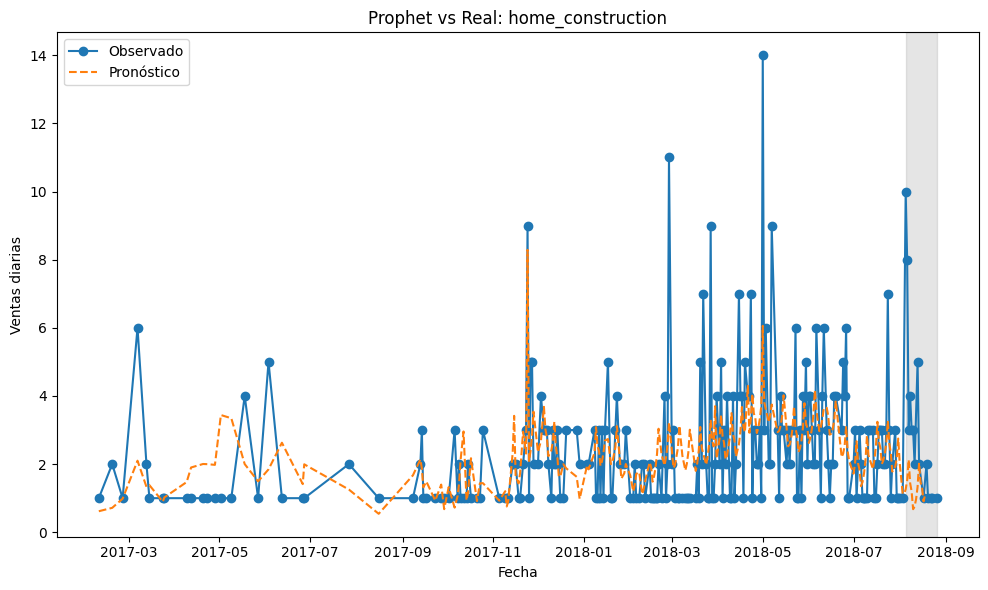

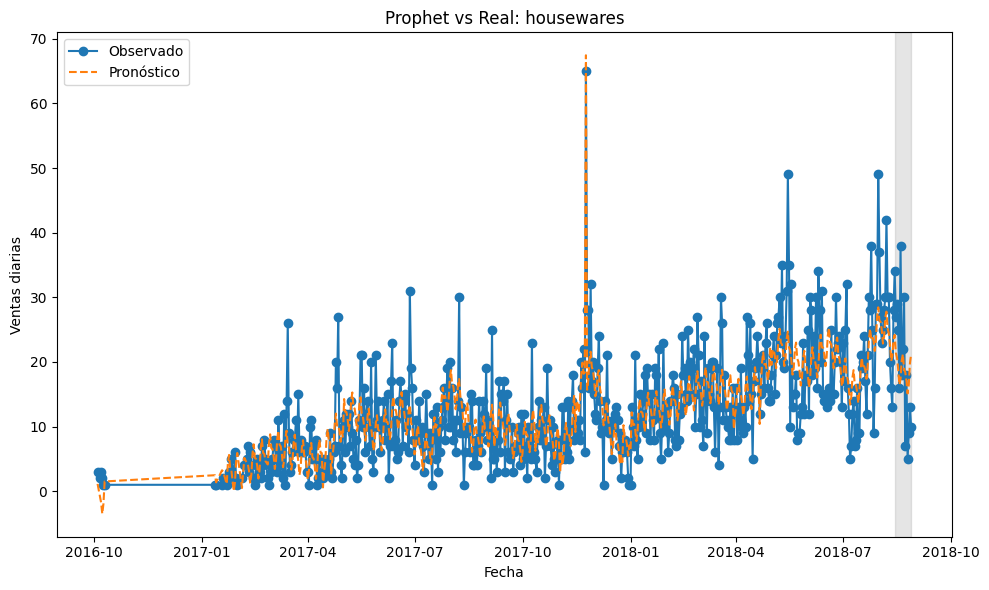

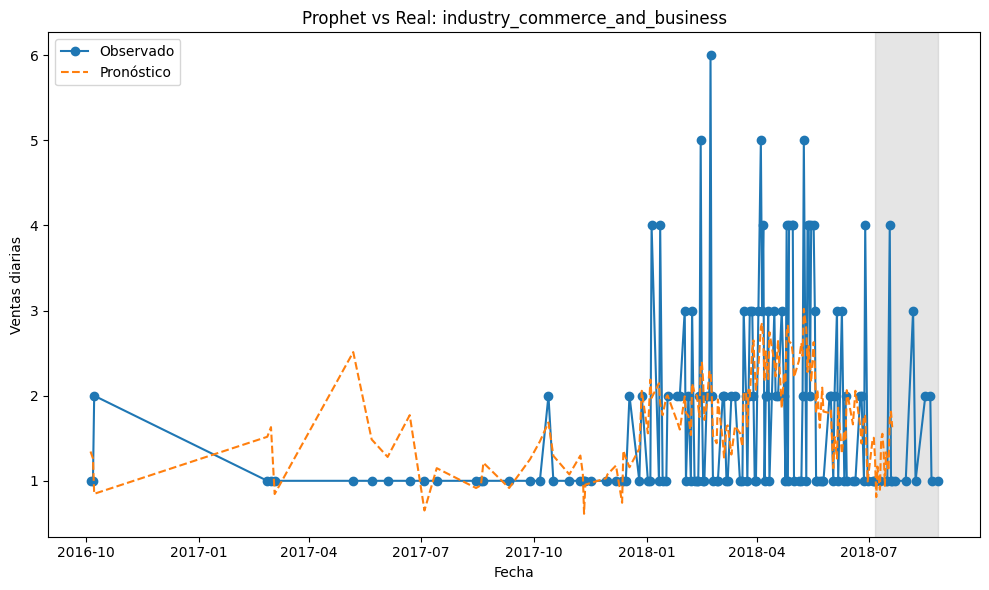

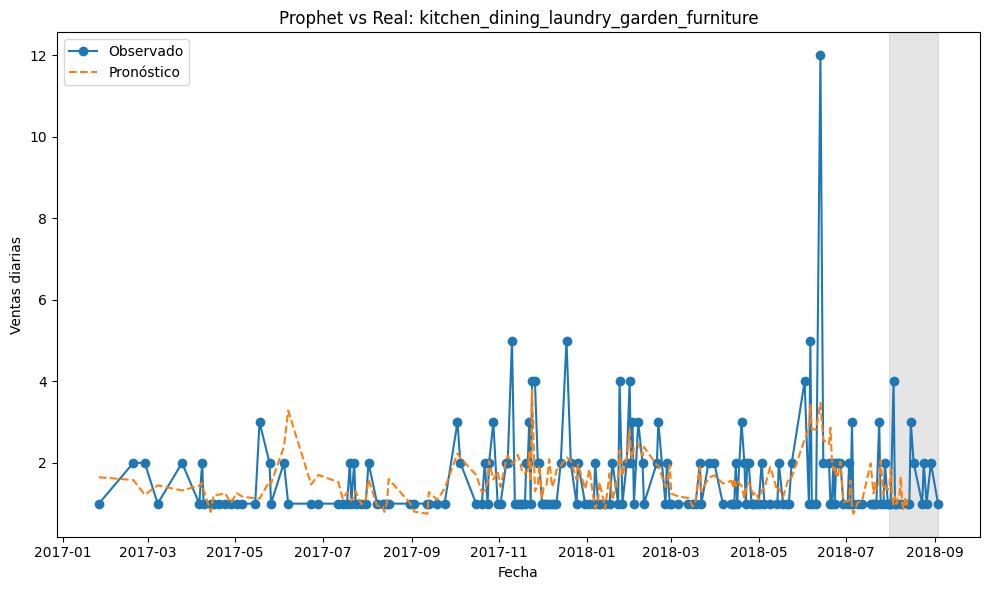

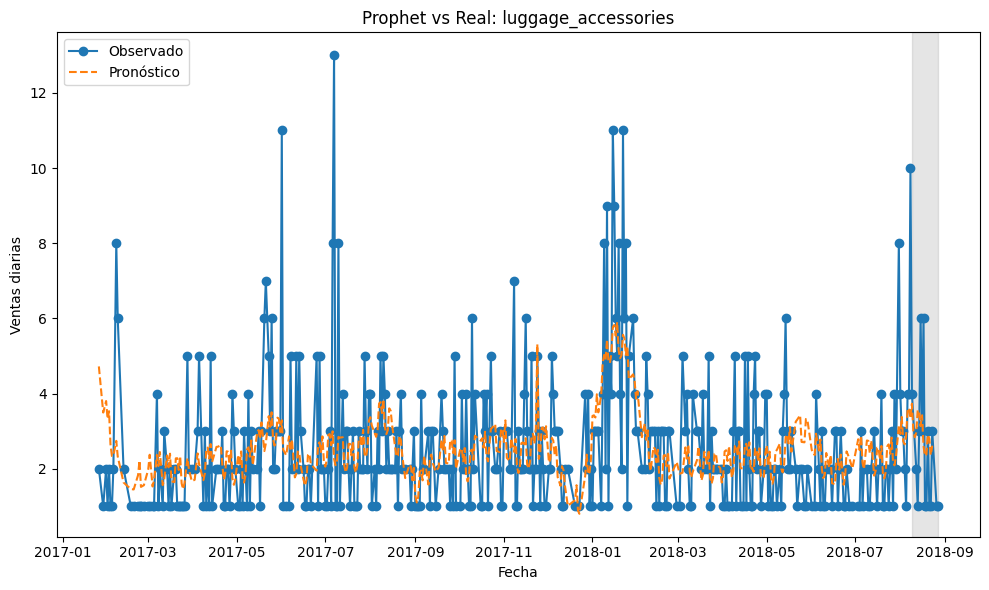

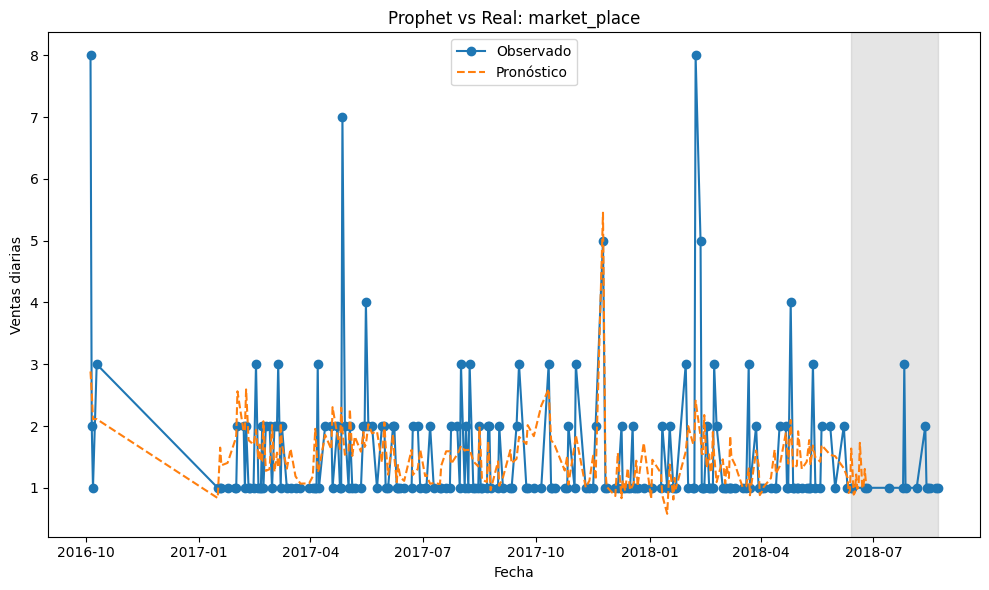

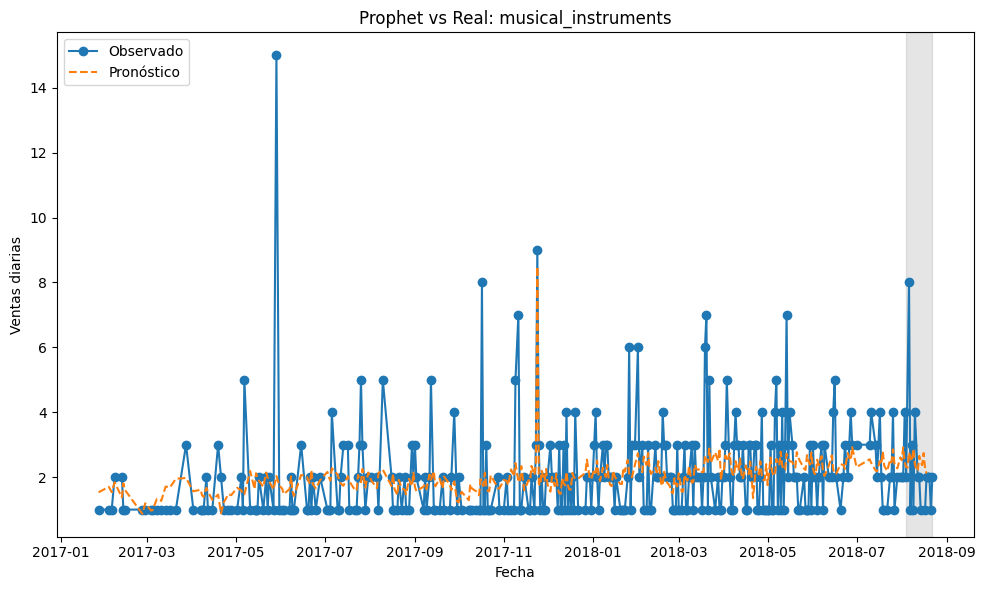

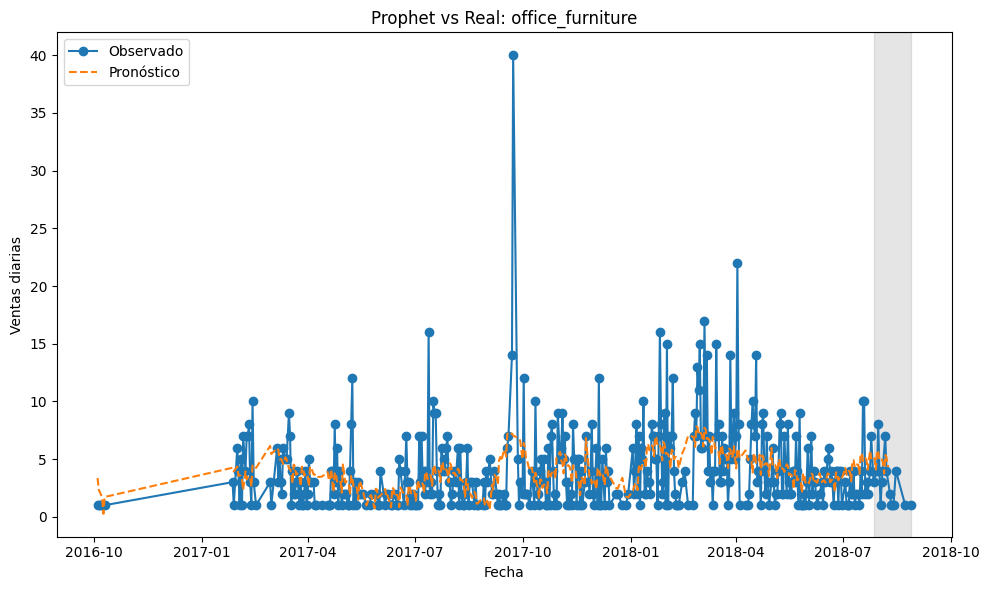

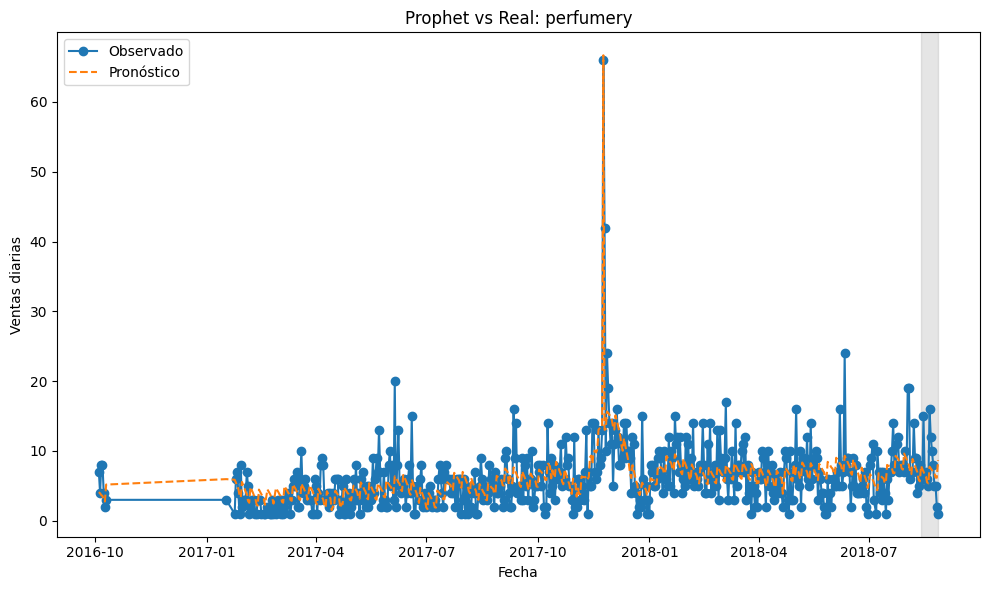

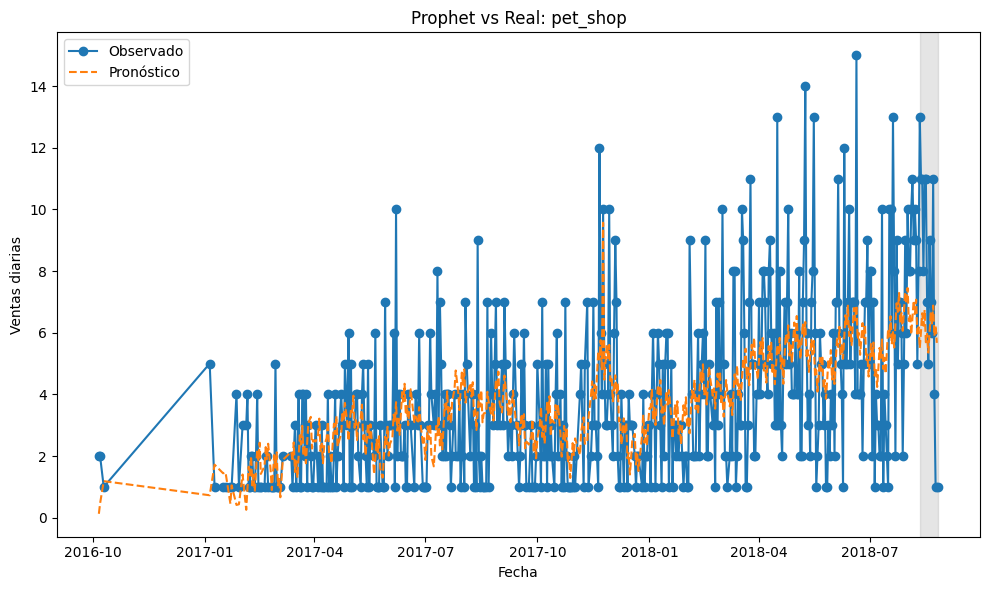

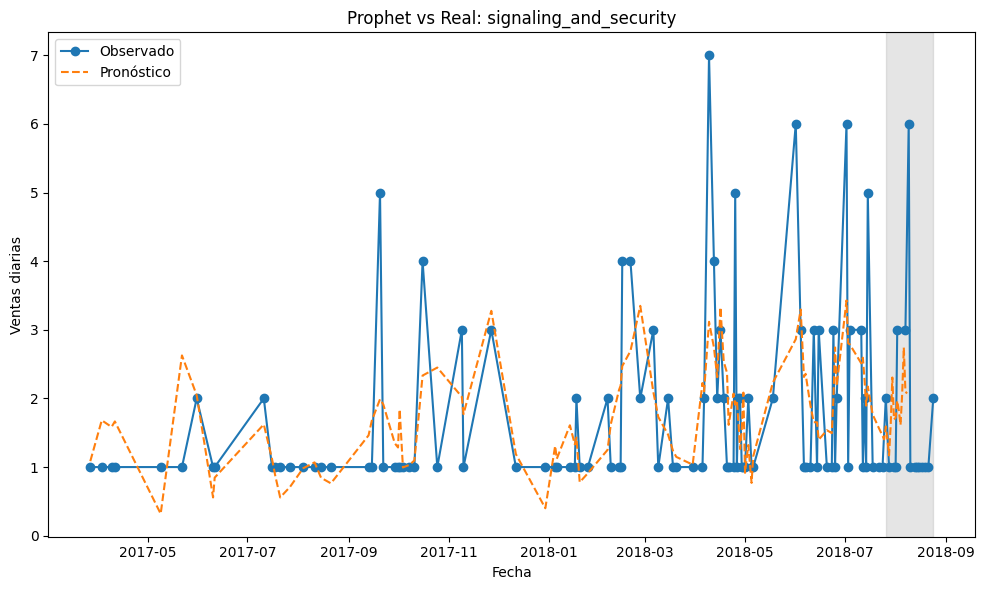

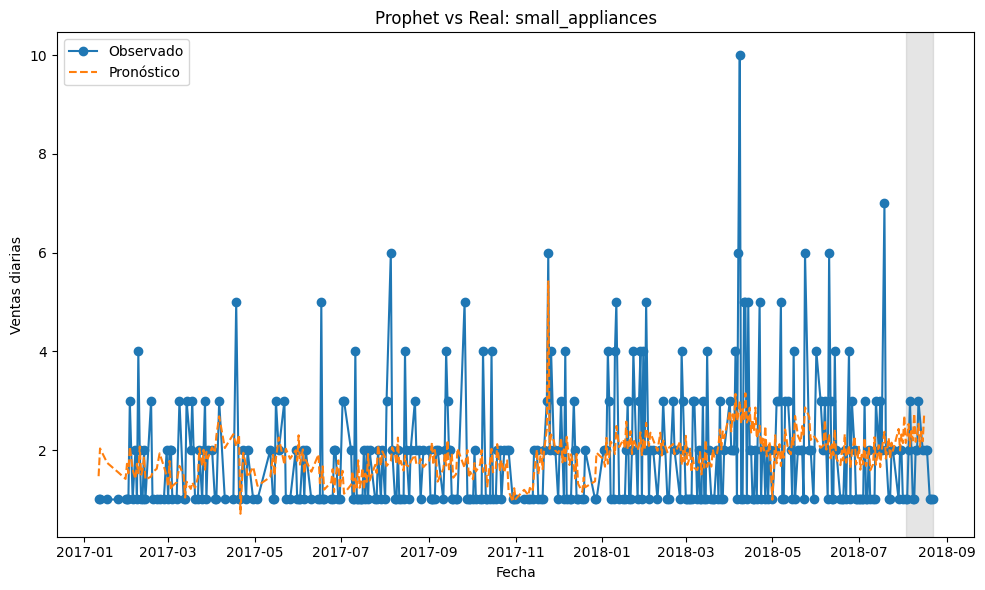

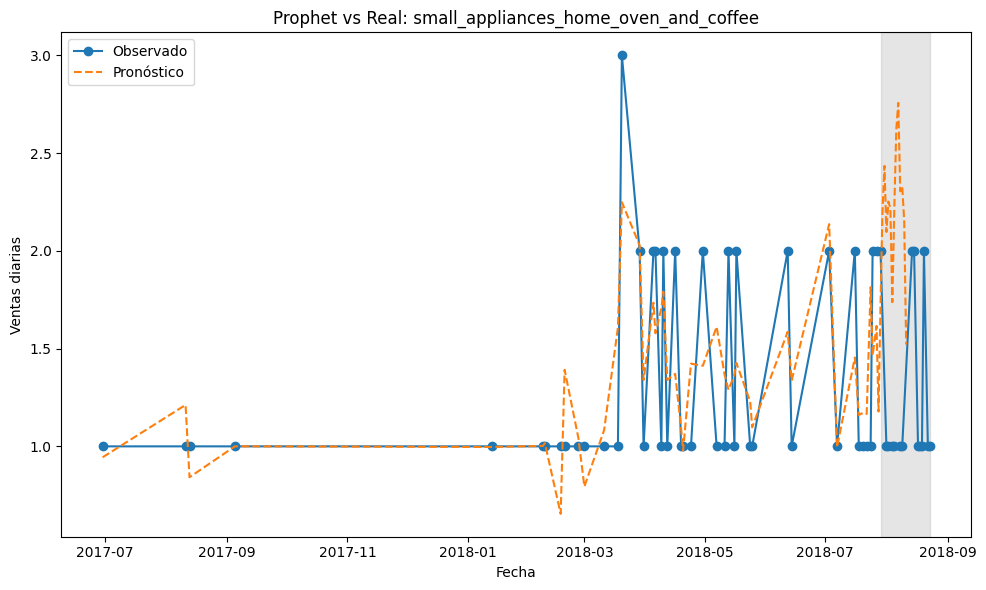

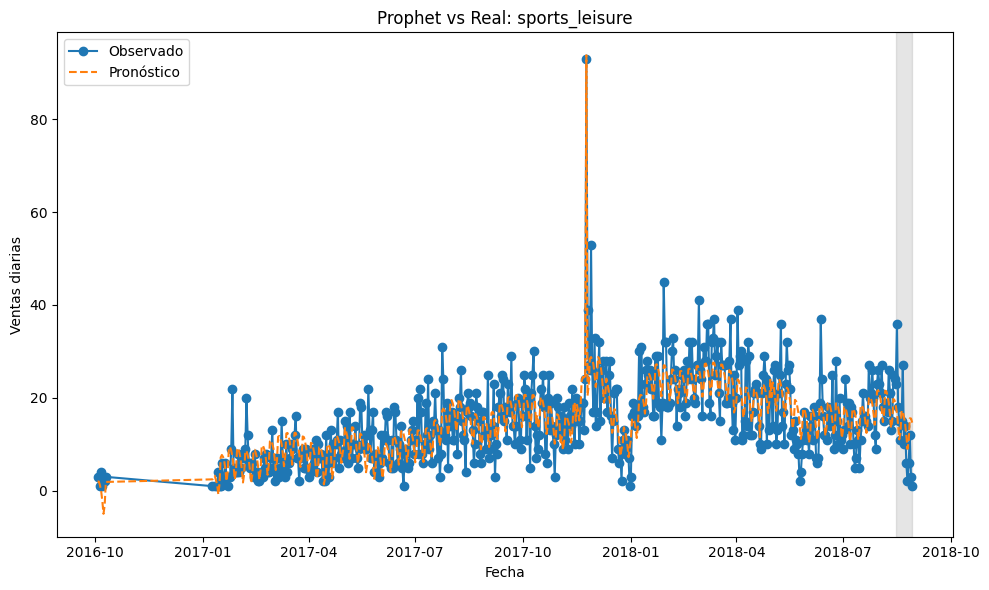

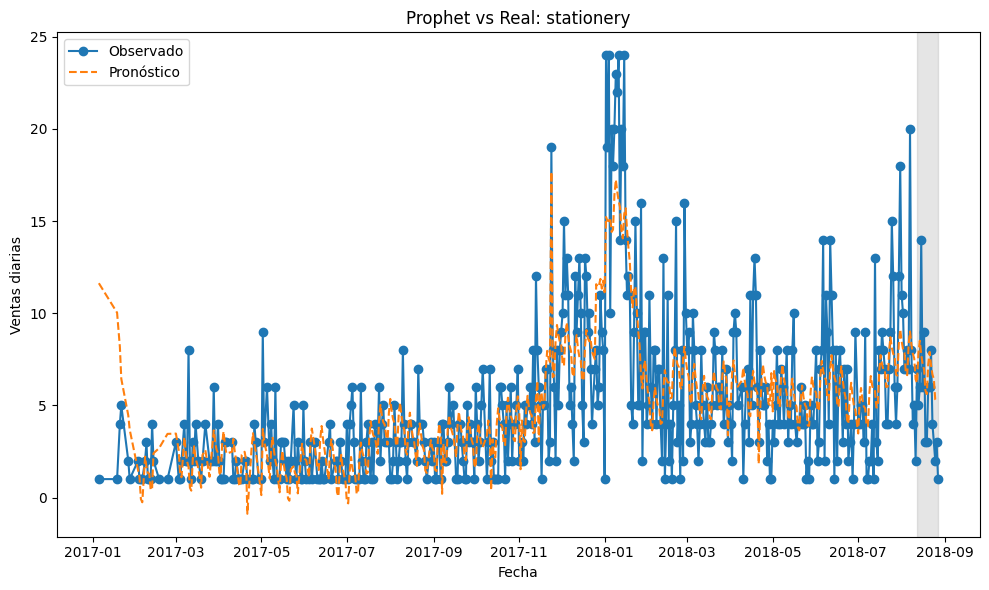

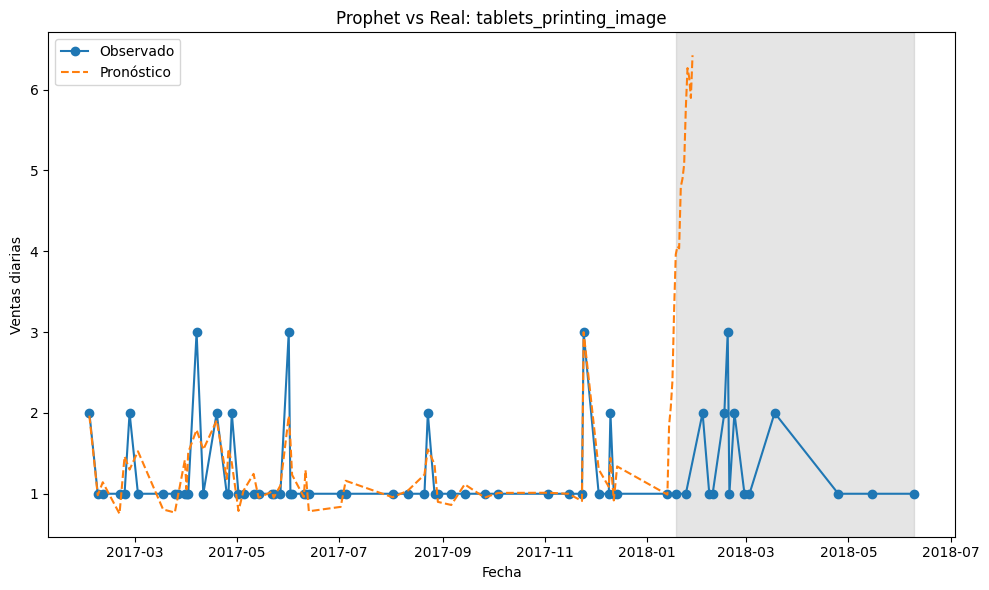

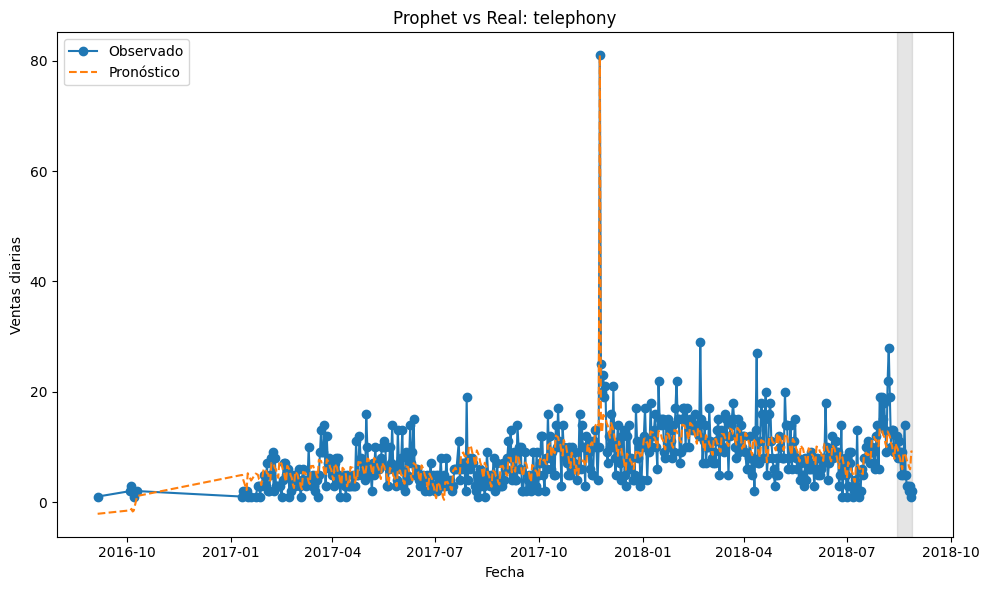

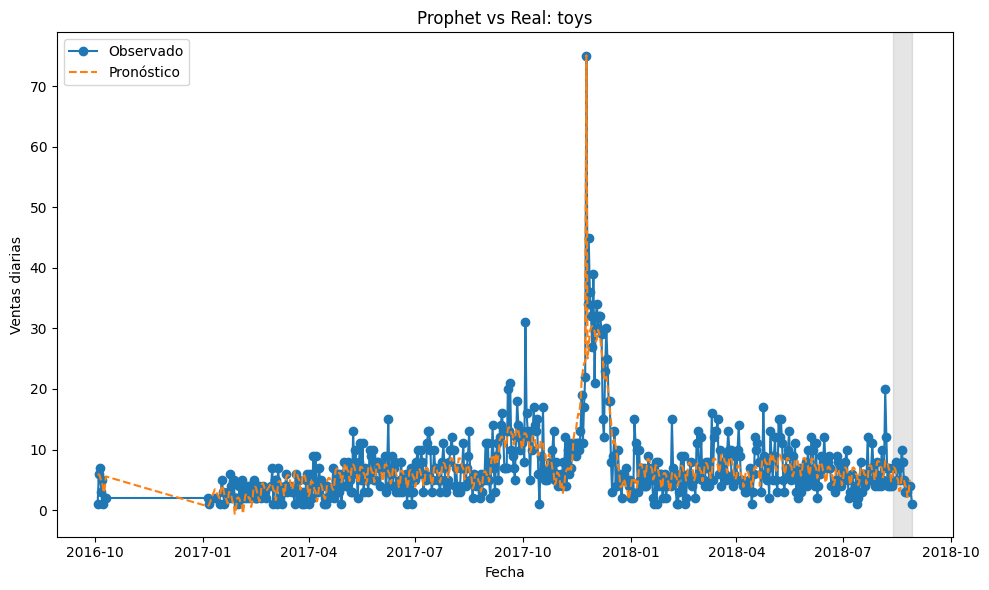

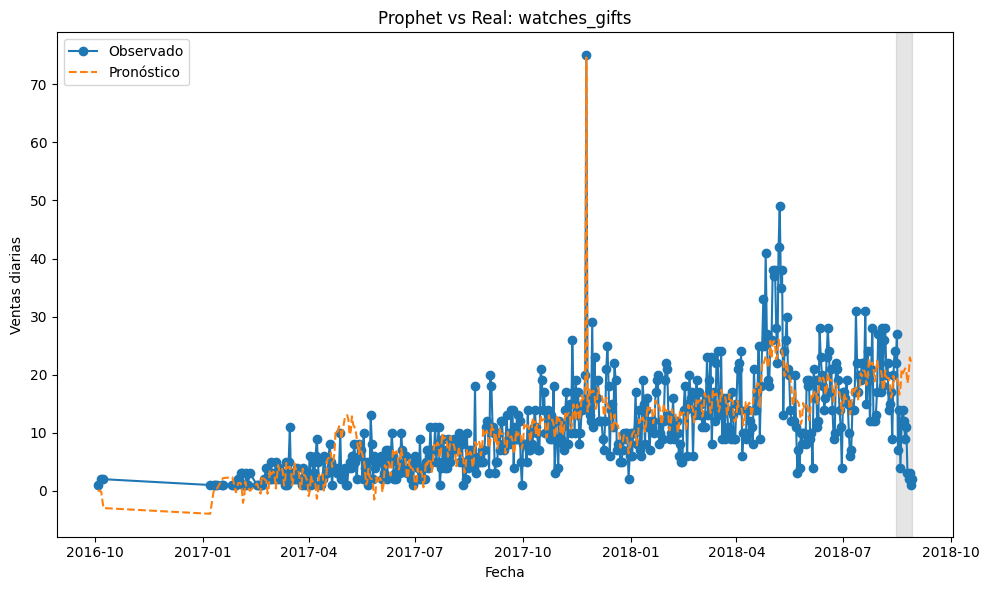

In [19]:
RAW_CSV = r"C:\Users\fdcontreras\OneDrive - Indra\Universidad\Despliegue de Soluciones Analíticas\Proyecto_Despliegue\Proyecto_Despliegue\data\02_processed\olist_consolidated_dataset.csv"

df = pd.read_csv(RAW_CSV, parse_dates=["order_purchase_timestamp"])
# Creamos la columna order_date
df["order_date"] = df["order_purchase_timestamp"].dt.date

# Reconstruimos daily
daily = (
    df.groupby(["product_category_name_english","order_date"])  
      .size().reset_index(name="units_sold")
)

# Celda 2: Selección de categorías válidas
# Criterio: ≥45 días únicos de ventas
rank = (
    daily.groupby("product_category_name_english")["order_date"]
        .nunique()
        .reset_index(name="unique_days")
)
valid_cats = rank[rank["unique_days"] >= 45]["product_category_name_english"].tolist()
print(f"Categorías válidas: {len(valid_cats)}")

# Celda 3: Festivos de Brasil y fechas de Black Friday
years   = sorted(daily["order_date"].apply(lambda d: d.year).unique())
br_hols = holidays.Brazil(years=years)
hols    = pd.DataFrame([{"ds": d, "holiday": "festivo"} for d in br_hols.keys()])

bf_dates = []
for y in years:
    nov = pd.date_range(f"{y}-11-01", f"{y}-11-30", freq="D")
    th  = nov[nov.weekday == 3]
    bf_dates.append((th[3] + pd.Timedelta(days=1)).date())

# Celda 4: Loop de Prophet para todas las categorías
results = []
forecasts = {}  # guardaremos sub, train, test, fcst
for cat in valid_cats:
    sub = (
        daily[daily["product_category_name_english"] == cat]
        .rename(columns={"order_date":"ds","units_sold":"y"})
        [["ds","y"]]
        .sort_values("ds")
        .reset_index(drop=True)
    )
    sub["ds"] = pd.to_datetime(sub["ds"])
    sub["bf"] = sub["ds"].dt.date.isin(bf_dates).astype(int)

    # Split: últimos 15 días test
    train = sub.iloc[:-15].reset_index(drop=True)
    test  = sub.iloc[-15:].reset_index(drop=True)

    # Ajuste de Prophet
    m = Prophet(
        holidays=hols,
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=False
    )
    m.add_regressor("bf")
    m.fit(train)

    # Pronóstico
    future = m.make_future_dataframe(periods=15, freq="D")
    future["bf"] = future["ds"].dt.date.isin(bf_dates).astype(int)
    fcst = m.predict(future)
    forecasts[cat] = (sub, train, test, fcst)

    # Merge robusto
    joined = pd.merge(
        test[["ds","y"]],
        fcst[["ds","yhat"]],
        on="ds",
        how="left"
    ).dropna(subset=["yhat"])

    if joined.empty:
        print(f"[{cat}] Sin solapamiento test/predicción, se omite métricas.")
        continue

    # Métricas
    mae  = mean_absolute_error(joined["y"], joined["yhat"])
    rmse = np.sqrt(mean_squared_error(joined["y"], joined["yhat"]))
    mape = np.mean(np.abs((joined["y"] - joined["yhat"]) / joined["y"])) * 100

    results.append({"category":cat, "MAE":mae, "RMSE":rmse, "MAPE (%)":mape})

# Celda 5: Mostrar resultados
res_prophet = pd.DataFrame(results).set_index("category")
display(res_prophet)

# Celda 6: Graficar pronóstico vs real para categorías con métricas
plot_cats = res_prophet.index.tolist()
for cat_plot in plot_cats:
    sub, train, test, fcst = forecasts[cat_plot]
    plt.figure(figsize=(10, 6))
    plt.plot(sub['ds'], sub['y'], label='Observado', marker='o')
    plt.plot(fcst['ds'], fcst['yhat'], label='Pronóstico', linestyle='--')
    plt.axvspan(test['ds'].min(), test['ds'].max(), color='gray', alpha=0.2)
    plt.title(f'Prophet vs Real: {cat_plot}')
    plt.xlabel('Fecha')
    plt.ylabel('Ventas diarias')
    plt.legend()
    plt.tight_layout()
    plt.show()